# 1 - Problem Statement:

### An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.

### Goal & Objective:
### This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.
### analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.
### This is the first phase of the agreement; hence, the company has shared very limited information. Once we are able to showcase a tangible impact with this much information then the company will open the 360-degree data lake for our consulting company to build a more robust model.

# 2 - Importing Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import cv2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression,SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
from sklearn.svm import SVR

# 3 - The Data

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
pd.set_option("display.max_columns",50)
df

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                      2             4651         Rented               24   
1                      4             6217  Company Owned               47   
2                      4             4306  Company Owned               64   
3                      2             6000         Rented               50   
4                      2             4740  Company Owned               42   
...                  ...              ...            ...              ...   
24995                  4             5390         Rented               19   
24996                  4             4490  Company Owned               57   
24997                  2             5403         Rented               31   
24998                  2            10562         Rented               25   
24999                  4             5664  Company Owned               21   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
0                   0            1                1             91   
1                   0            0                1            210   
2                   0            0                0            161   
3                   0            0                0            103   
4                   1            0                1            112   
...               ...          ...              ...            ...   
24995               0            0                1            142   
24996               0            0                1            130   
24997               1            0                1            147   
24998               0            0                1             60   
24999               0            1                1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...       

In [4]:
# these are the columns of the data
for n in df.columns:
    print(n)

Ware_house_ID
WH_Manager_ID
Location_type
WH_capacity_size
zone
WH_regional_zone
num_refill_req_l3m
transport_issue_l1y
Competitor_in_mkt
retail_shop_num
wh_owner_type
distributor_num
flood_impacted
flood_proof
electric_supply
dist_from_hub
workers_num
wh_est_year
storage_issue_reported_l3m
temp_reg_mach
approved_wh_govt_certificate
wh_breakdown_l3m
govt_check_l3m
product_wg_ton


1-> Ware_house_ID corresponds to Product warehouse_id,

2-> WH_Manager_ID corresponds to Employee ID of warehouse manager

3-> Location_type corresponds to Location of warehouse-like in city or village

4-> WH_capacity_size corresponds to Storage capacity size of the warehouse

5-> zone corresponds to Zone of the warehouse

6-> WH_regional_zone corresponds to Regional zone of the warehouse under each zone

7-> num_refill_req_l3m corresponds to Number of times refilling has been done in last 3 months

8-> transport_issue_l1y corresponds to Any transport issue like accident or goods stolen reported in last one year

9-> Competitor_in_mkt corresponds to Number of instant noodles competitors in the market

10-> retail_shop_num corresponds to Number of the retail shop that sell the product under the warehouse area

11-> wh_owner_type corresponds to Company is owning the warehouse or they have got the  warehouse on rent

12-> distributor_num corresponds to The number of distributer works in between warehouse and retail shops.

13-> flood_impacted corresponds to Warehouse is in the Flood impacted area indicator.

14-> flood_proof corresponds to Warehouse is a flood-proof indicator.  Like storage is at some height not flood_proof

15-> electric_supply corresponds to Warehouse have electric back up like generator, so they can run the warehouse in load shedding

16-> dist_from_hub corresponds to Distance between warehouse to the production hub in Kms

17-> workers_num corresponds to Number of workers working in the warehouse

18-> wh_est_year corresponds to Warehouse established year

19-> storage_issue_reported_l3m corresponds to Warehouse reported storage issue to corporate office in last 3 months. Like rat, fungus because of moisture etc.

20-> temp_reg_mach corresponds to Warehouse have temperature regulating machine indicator

21-> approved_wh_govt_certificate corresponds to What kind of standard certificate has been issued to the warehouse from government regulatory body

22-> wh_breakdown_l3m corresponds to Number of time warehouse face a breakdown in last 3 months. Like strike from worker, flood, or electrical failure

23-> govt_check_l3m corresponds to Number of time government Officers have been visited the warehouse to check the quality and expire of stored food in last 3 months

24-> product_wg_ton corresponds to Product has been shipped in last 3 months. Weight is in tons

# 4 - Exploratory Data Analysis

In [5]:
# checking for null values
print(df.isnull().sum())

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64


In [6]:
# percentage of these null values
print((df.isnull().sum()/len(df))*100)

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64


In [7]:
# Insight 1: we see that that around 4% of values that are null in workers_num feature, around 3.6% of
# null values in the approved_wh_govt_certificate feature and a whopping 47.5% null values in the wh_east_year.
# feature.

In [8]:
# as of now we are in the EDA stage so we dont handle them right now, however going ahead before
# modelling, at the preprocessing stage we would go ahead and handle them.

In [9]:
# lets check if there are duplicate no. of warehouses

In [10]:
df[df['Ware_house_ID'].duplicated(keep='first')]

Empty DataFrame
Columns: [Ware_house_ID, WH_Manager_ID, Location_type, WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num, wh_owner_type, distributor_num, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num, wh_est_year, storage_issue_reported_l3m, temp_reg_mach, approved_wh_govt_certificate, wh_breakdown_l3m, govt_check_l3m, product_wg_ton]
Index: []

In [11]:
# we see no duplicate values here hence there are 25000 warehouses of the company

In [12]:
# lets check the datatypes of the features
df.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [13]:
# the datatypes of the columns look fine.

In [14]:
# now lets perform in-depth analysis of the data

In [15]:
df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [16]:
# so there are very high number of warehouses in rural areas than urban areas.

In [17]:
df['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [18]:
# here we see we have very high number of large and mid size warehouses as compared to small size.

In [19]:
pd.crosstab(df['Location_type'],df['WH_capacity_size'])

WH_capacity_size  Large   Mid  Small
Location_type                       
Rural              9331  9172   4454
Urban               838   848    357

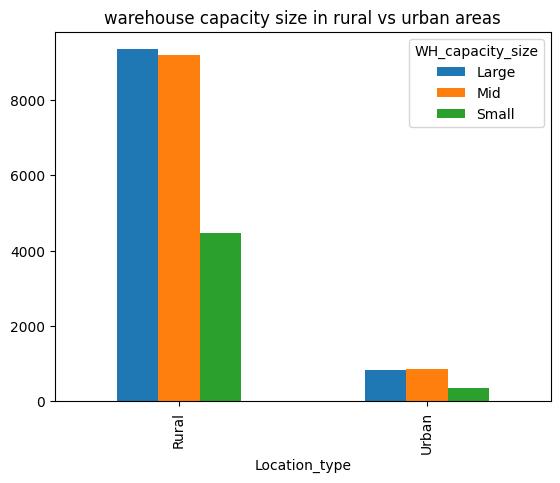

In [20]:
pd.crosstab(df['Location_type'],df['WH_capacity_size']).plot(kind='bar')
plt.title('warehouse capacity size in rural vs urban areas')
plt.show()

In [21]:
# we see that there are more warehouses established in the rural areas than urban areas.

In [22]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [23]:
# we see there are very low number of warehouses in the east

In [24]:
pd.crosstab(df['zone'],df['WH_capacity_size'])

WH_capacity_size  Large   Mid  Small
zone                                
East                 74   254    101
North              5490  3001   1787
South              1615  3211   1536
West               2990  3554   1387

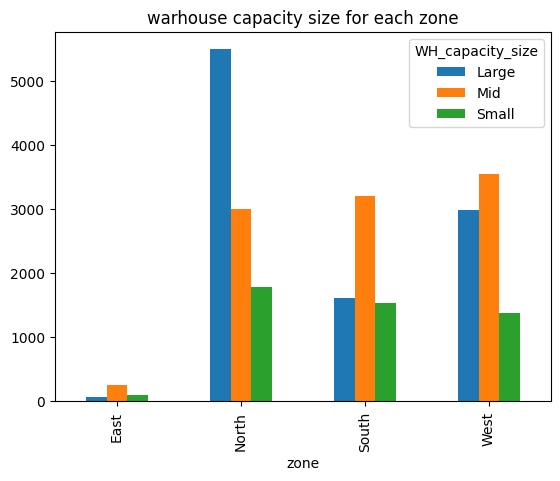

In [25]:
pd.crosstab(df['zone'],df['WH_capacity_size']).plot(kind='bar')
plt.title('warhouse capacity size for each zone')
plt.show()

In [26]:
# we see that the east region has very low number of warehouses of any size, and north region has very
# high number of large warehouses.

In [27]:
df['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [28]:
pd.crosstab(df['WH_regional_zone'],df['WH_capacity_size'])

WH_capacity_size  Large   Mid  Small
WH_regional_zone                    
Zone 1                0     0   2054
Zone 2                0  2963      0
Zone 3                0  2881      0
Zone 4                0  4176      0
Zone 5             4587     0      0
Zone 6             5582     0   2757

In [29]:
# we see large size warehouses are there only in zone 5 and zone 6, similarly mid size warehouses are
# there only in zone 2, zone 3 and zone 4, and lastly small size warehouses are there only in zone 1
# and zone 6

In [30]:
# lets check the total and average number of Competitors in the market for each pockets of the country.

In [31]:
location_wise_sum_competitors=df.groupby("Location_type").aggregate({"Competitor_in_mkt":lambda x: x.sum()})

In [32]:
location_wise_sum_competitors

Competitor_in_mkt
Location_type                   
Rural                      71176
Urban                       6429

In [33]:
location_wise_avg_competitors=df.groupby("Location_type").aggregate({"Competitor_in_mkt":lambda x: x.mean()})

In [34]:
location_wise_avg_competitors

Competitor_in_mkt
Location_type                   
Rural                   3.100405
Urban                   3.146843

In [35]:
zone_wise_sum_competitors=df.groupby("zone").aggregate({"Competitor_in_mkt":lambda x: x.sum()})

In [36]:
zone_wise_sum_competitors

Competitor_in_mkt
zone                    
East                2241
North              30666
South              15984
West               28714

In [37]:
zone_wise_avg_competitors=df.groupby("zone").aggregate({"Competitor_in_mkt":lambda x: x.mean()})

In [38]:
zone_wise_avg_competitors

Competitor_in_mkt
zone                    
East            5.223776
North           2.983654
South           2.512417
West            3.620477

In [39]:
regional_zone_wise_sum_competitors=df.groupby("WH_regional_zone").aggregate({"Competitor_in_mkt":lambda x: x.sum()})

In [40]:
regional_zone_wise_sum_competitors

Competitor_in_mkt
WH_regional_zone                   
Zone 1                         6341
Zone 2                         8526
Zone 3                         9122
Zone 4                        13530
Zone 5                        13972
Zone 6                        26114

In [41]:
regional_zone_wise_sum_competitors=df.groupby("WH_regional_zone").aggregate({"Competitor_in_mkt":lambda x: x.mean()})

In [42]:
regional_zone_wise_sum_competitors

Competitor_in_mkt
WH_regional_zone                   
Zone 1                     3.087147
Zone 2                     2.877489
Zone 3                     3.166262
Zone 4                     3.239943
Zone 5                     3.046000
Zone 6                     3.131551

In [43]:
# Insight 2: we see that the average number of competitors are almost same for each of the respective pocket
# of the country, except for the east zone of the country which has higher average number of competitors
# in the country than the other zones.

In [44]:
# lets check the distribution of various features of the data.

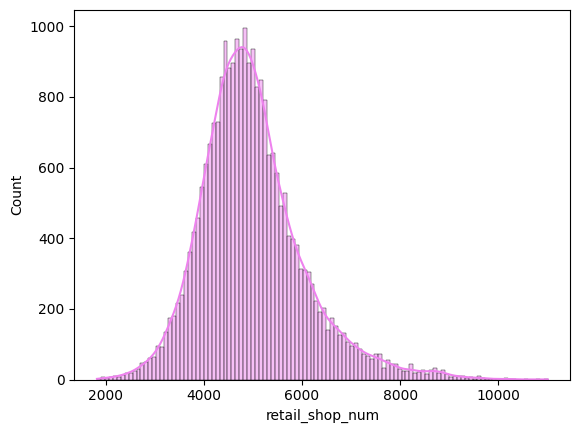

In [45]:
sns.histplot(df['retail_shop_num'],kde=True,color='violet')
plt.show()

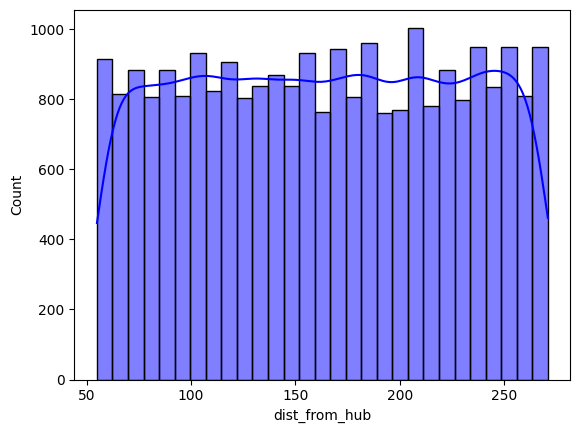

In [46]:
sns.histplot(df['dist_from_hub'],kde=True,color='blue')
plt.show()

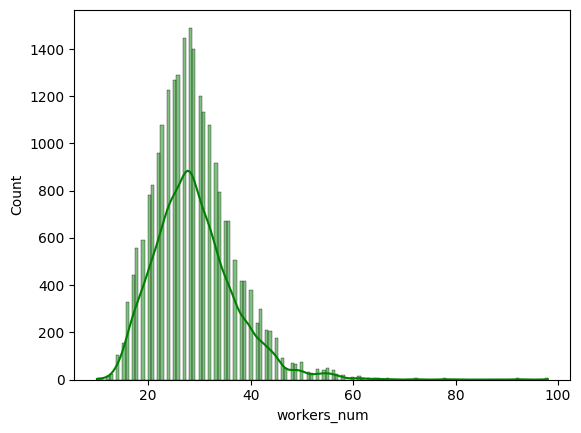

In [47]:
sns.histplot(df['workers_num'],kde=True,color='green')
plt.show()

In [48]:
# Insight 3: we see that the number of retail shops seeling the product is normally distributed
# while the distance between warehouse and the production hub is uniformly distributed and the number
# of workers in the warehouse is a bit right skewed and the gaps in the distribution is due to the
# null values.

In [49]:
# lets check the distribution of our target variable.

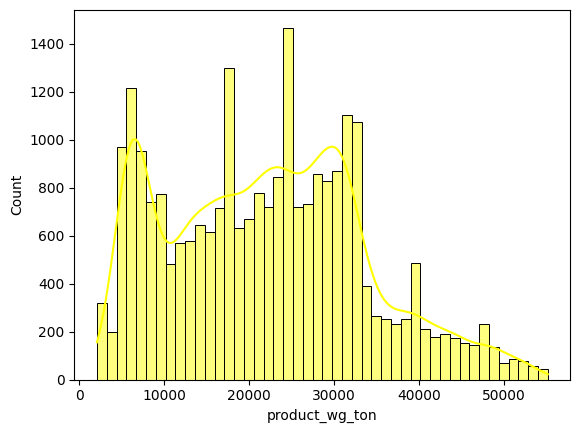

In [50]:
sns.histplot(df['product_wg_ton'],kde=True,color='yellow')
plt.show()

In [51]:
# the distribution looks random.

In [52]:
avg_govt_checks_location=df.groupby('Location_type').aggregate({'govt_check_l3m':lambda x: x.mean()})

In [53]:
avg_govt_checks_location

govt_check_l3m
Location_type                
Rural               18.804417
Urban               18.900636

In [54]:
# we see the average no. of government checks are same for rural as well as urban areas.

In [55]:
avg_govt_checks_size=df.groupby('WH_capacity_size').aggregate({'govt_check_l3m':lambda x: x.mean()})

In [56]:
avg_govt_checks_size

govt_check_l3m
WH_capacity_size                
Large                  19.004327
Mid                    20.776547
Small                  14.315319

In [57]:
# Insight 4: we see that the average number of government checks for small warehouses are quite low
# compared to mid and large warehouses.

In [58]:
avg_govt_checks_zone=df.groupby('zone').aggregate({'govt_check_l3m':lambda x: x.mean()})

In [59]:
avg_govt_checks_zone

govt_check_l3m
zone                 
East        22.785548
North       19.928683
South       20.267840
West        15.982978

In [60]:
# Insight 5: we see that the average number of government checks for warehouses of west zone are
# quite low as compared to other zones.

In [61]:
avg_breakdowns_location=df.groupby('Location_type').aggregate({'wh_breakdown_l3m':lambda x: x.mean()})

In [62]:
avg_breakdowns_location

wh_breakdown_l3m
Location_type                  
Rural                  3.458204
Urban                  3.749878

In [63]:
avg_breakdowns_zone=df.groupby('zone').aggregate({'wh_breakdown_l3m':lambda x: x.mean()})

In [64]:
avg_breakdowns_zone

wh_breakdown_l3m
zone                   
East           3.531469
North          3.464779
South          3.466677
West           3.514059

In [65]:
avg_breakdowns_size=df.groupby('WH_capacity_size').aggregate({'wh_breakdown_l3m':lambda x: x.mean()})

In [66]:
avg_breakdowns_size

wh_breakdown_l3m
WH_capacity_size                  
Large                     3.475268
Mid                       3.496906
Small                     3.465392

In [67]:
avg_breakdowns_regional_zone=df.groupby('WH_regional_zone').aggregate({'wh_breakdown_l3m':lambda x: x.mean()})

In [68]:
avg_breakdowns_regional_zone

wh_breakdown_l3m
WH_regional_zone                  
Zone 1                    3.459591
Zone 2                    3.472157
Zone 3                    3.518570
Zone 4                    3.499521
Zone 5                    3.489863
Zone 6                    3.465404

In [69]:
# we see that the average no. of breakdowns are quite similar for all the locations, zones,
# regional zones and size.

In [70]:
# lets check the no. of warehouses with different types of approved government certificates.
print(df['approved_wh_govt_certificate'].value_counts())

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


In [71]:
# percentage of warehouses with different types of approved government certificates.
print((df['approved_wh_govt_certificate'].value_counts()/len(df))*100)

C     22.004
B+    19.668
B     19.248
A     18.684
A+    16.764
Name: approved_wh_govt_certificate, dtype: float64


In [72]:
# Insight 6: we see that 22% of the warehouses are certified as "C" grade by the government, followed
# by around 19% as "B+" and "B", 18% as "A" and 16% as "A+"

In [73]:
location_wise_avg_storage_issue=df.groupby('Location_type').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [74]:
location_wise_avg_storage_issue

storage_issue_reported_l3m
Location_type                            
Rural                           16.915581
Urban                           19.544787

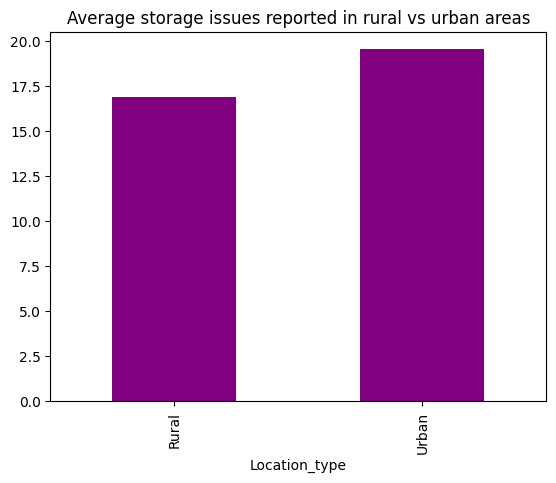

In [75]:
location_wise_avg_storage_issue.plot(kind='bar',color='purple',legend=False)
plt.title('Average storage issues reported in rural vs urban areas')
plt.show()

In [76]:
# Insight 7: we see that the average number of storage issues reported are slighly more in urban areas
# as compared to rural areas.

In [77]:
size_wise_avg_storage_issue=df.groupby('WH_capacity_size').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [78]:
size_wise_avg_storage_issue

storage_issue_reported_l3m
WH_capacity_size                            
Large                              17.135117
Mid                                17.213673
Small                              16.947204

In [79]:
zone_wise_avg_storage_issue=df.groupby('zone').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [80]:
zone_wise_avg_storage_issue

storage_issue_reported_l3m
zone                             
East                    17.701632
North                   17.197898
South                   17.001886
West                    17.115244

In [81]:
regional_zone_wise_avg_storage_issue=df.groupby('WH_regional_zone').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [82]:
regional_zone_wise_avg_storage_issue

storage_issue_reported_l3m
WH_regional_zone                            
Zone 1                             16.823272
Zone 2                             17.386770
Zone 3                             17.044429
Zone 4                             17.207615
Zone 5                             17.059516
Zone 6                             17.145101

In [83]:
# we see apart from that storage issues reported are almost same for all other features such as location,
# size, zone and regional zone.

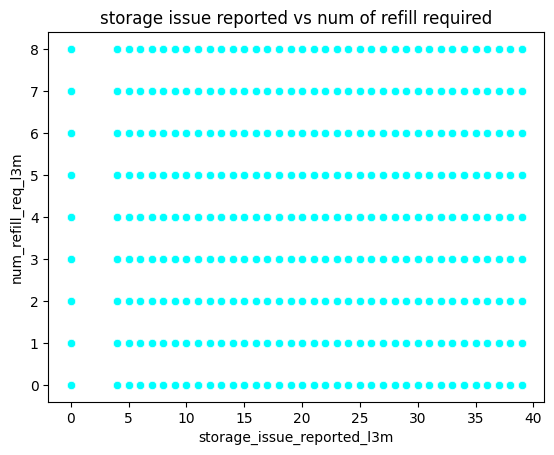

In [84]:
sns.scatterplot(data=df,x='storage_issue_reported_l3m',y='num_refill_req_l3m',color='cyan')
plt.title('storage issue reported vs num of refill required')
plt.show()

In [85]:
# here we see no relation between the storage issue reported and the number of refills required in last
# 3 months.

In [86]:
avg_num_workers_based_on_num_breakdown=df.groupby('wh_breakdown_l3m').aggregate({'workers_num':lambda x: x.mean()})

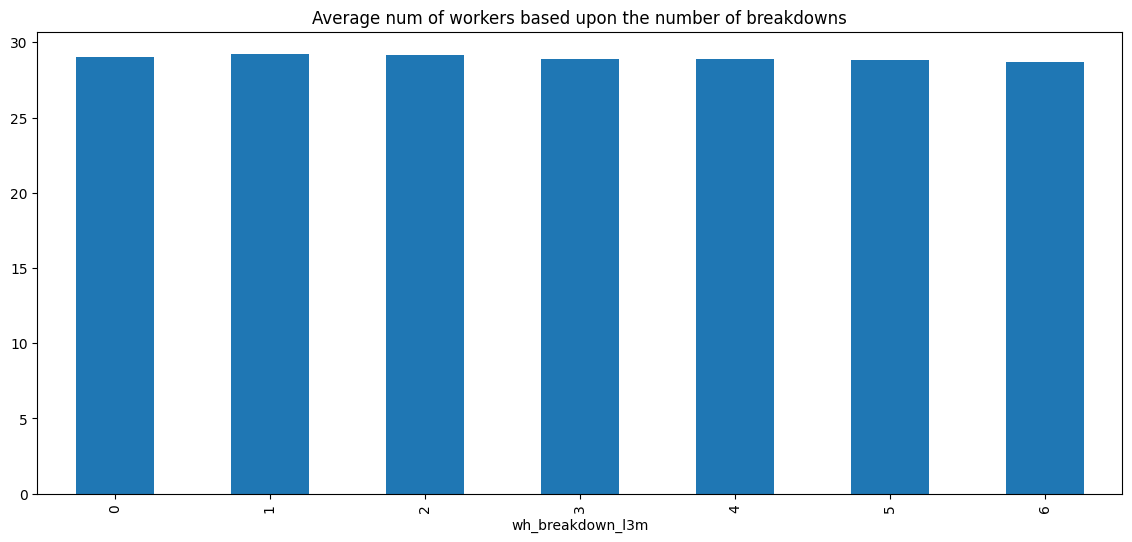

In [87]:
avg_num_workers_based_on_num_breakdown.plot(kind='bar',figsize=(14,6),legend=False)
plt.title('Average num of workers based upon the number of breakdowns')
plt.show()

In [88]:
# here we see no significant difference in average number of workers based upon the number of breakdowns.

In [89]:
average_distance_from_hub_based_upon_transport_issues_reported=df.groupby('transport_issue_l1y').aggregate({'dist_from_hub':lambda x: x.mean()})

In [90]:
average_distance_from_hub_based_upon_transport_issues_reported

dist_from_hub
transport_issue_l1y               
0                       162.899507
1                       163.914729
2                       165.483167
3                       164.066557
4                       163.274131
5                       171.919540

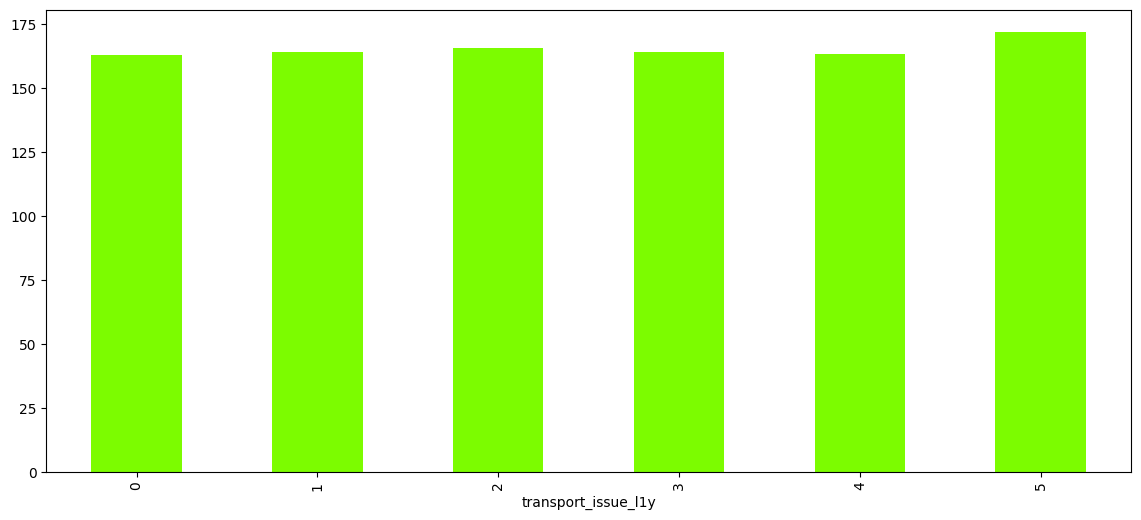

In [91]:
average_distance_from_hub_based_upon_transport_issues_reported.plot(kind='bar',color='lawngreen',figsize=(14,6),legend=False)
plt.show()

In [92]:
# Insight 8: We see on average the more the distance it is from hub the more the transport issues
# reported in last 1 year.

In [93]:
avg_storage_issue_reported_based_upon_temp_reg_machine_installed=df.groupby('temp_reg_mach').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [94]:
avg_storage_issue_reported_based_upon_temp_reg_machine_installed

storage_issue_reported_l3m
temp_reg_mach                            
0                               16.723619
1                               18.065022

In [95]:
# Insight 9: Now this is strange, that the average number of storage issues reported is more for the
# warehouses where the the temperature regulator machine is installed compared to where it is not installed

In [96]:
avg_num_workers_based_location=df.groupby('Location_type').aggregate({'workers_num':lambda x: x.mean()})

In [97]:
avg_num_workers_based_location

workers_num
Location_type             
Rural            28.950823
Urban            28.872395

In [98]:
# we see the average number of workers is almost same for rural as well as urban areas.

In [99]:
avg_num_workers_based_size=df.groupby('WH_capacity_size').aggregate({'workers_num':lambda x: x.mean()})

In [100]:
avg_num_workers_based_size

workers_num
WH_capacity_size             
Large               29.023595
Mid                 28.795626
Small               29.088229

In [101]:
# we see the average number of workers is almost same for different warehouses sizes.

In [102]:
avg_num_workers_based_zone=df.groupby('zone').aggregate({'workers_num':lambda x: x.mean()})

In [103]:
avg_num_workers_based_zone

workers_num
zone              
East     29.247573
North    28.924790
South    28.892003
West     28.995405

In [104]:
# we see the average number of workers is almost same for all the zones.

In [105]:
avg_num_workers_based_regional_zone=df.groupby('WH_regional_zone').aggregate({'workers_num':lambda x: x.mean()})

In [106]:
avg_num_workers_based_regional_zone

workers_num
WH_regional_zone             
Zone 1              29.079574
Zone 2              28.743536
Zone 3              29.003240
Zone 4              28.688950
Zone 5              28.988831
Zone 6              29.066117

In [107]:
# we see the average number of workers is almost same for all of the regional zones.

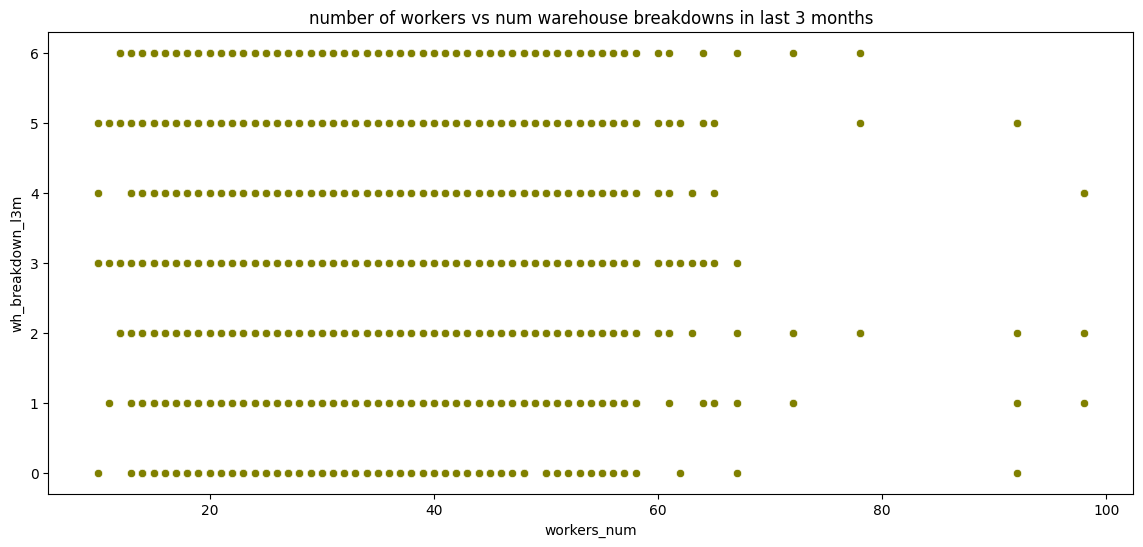

In [108]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x='workers_num',y='wh_breakdown_l3m',color='olive')
plt.title('number of workers vs num warehouse breakdowns in last 3 months')
plt.show()

In [109]:
# we see no apparent relation between both of these features.

In [110]:
avg_distance_from_hub_location_wise=df.groupby('Location_type').aggregate({'dist_from_hub':lambda x: x.mean()})

In [111]:
avg_distance_from_hub_location_wise

dist_from_hub
Location_type               
Rural             163.647994
Urban             162.293686

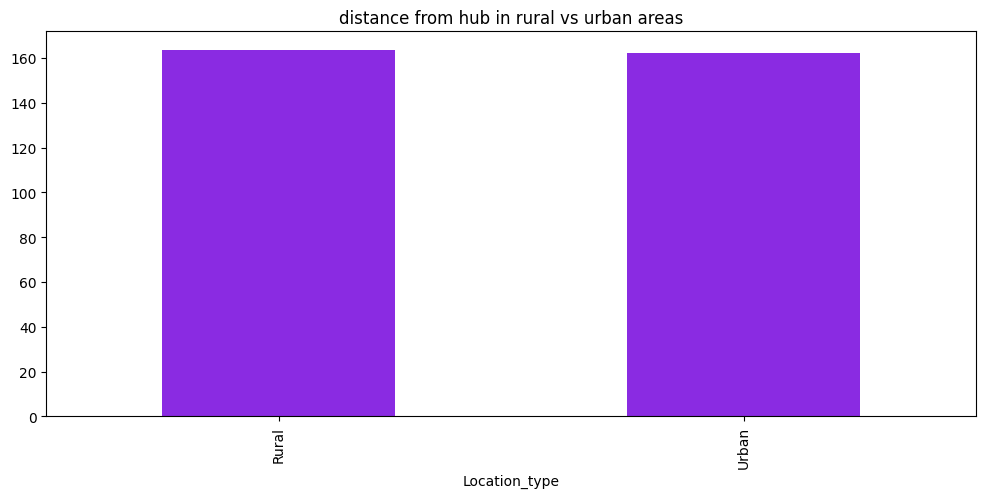

In [112]:
avg_distance_from_hub_location_wise.plot(kind='bar',color='blueviolet',figsize=(12,5),legend=False)
plt.title('distance from hub in rural vs urban areas')
plt.show()

In [113]:
# we see the distance from hub is pretty much the same for rural as well as urban areas

In [114]:
avg_distance_from_hub_zone_wise=df.groupby('zone').aggregate({'dist_from_hub':lambda x: x.mean()})

In [115]:
avg_distance_from_hub_zone_wise

dist_from_hub
zone                
East      162.634033
North     162.900953
South     164.128733
West      163.936452

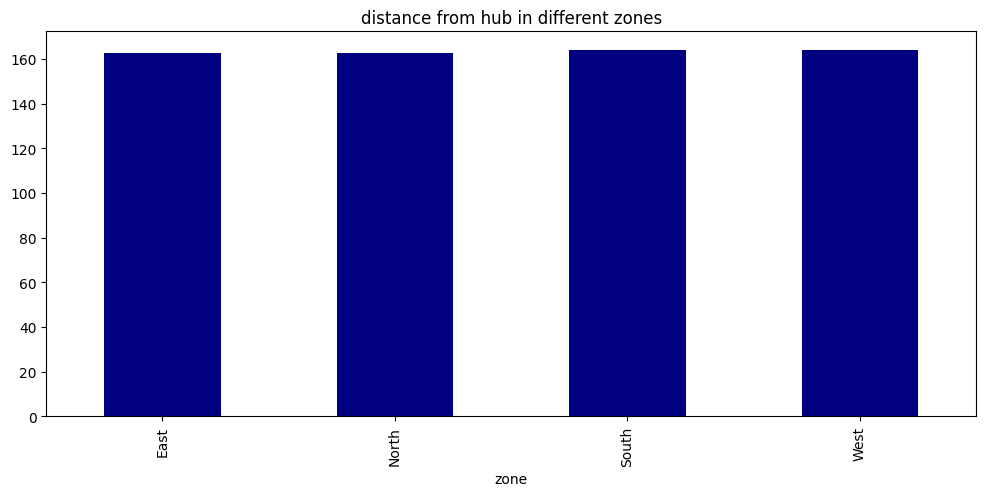

In [116]:
avg_distance_from_hub_zone_wise.plot(kind='bar',color='navy',figsize=(12,5),legend=False)
plt.title('distance from hub in different zones')
plt.show()

In [117]:
# we see the distance from hub is pretty much the same for all the zones

In [118]:
pd.crosstab(df['Location_type'],df['electric_supply'])

electric_supply     0      1
Location_type               
Rural            7862  15095
Urban             716   1327

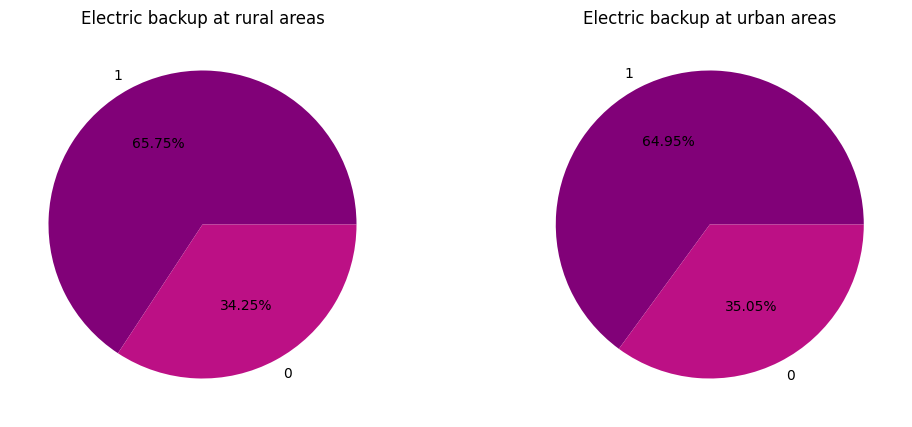

In [119]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df[df['Location_type']=='Rural']['electric_supply'].value_counts(),
        labels=df[df['Location_type']=='Rural']['electric_supply'].value_counts().index,
       autopct='%0.2f%%',colors=sns.color_palette('RdPu_r'))
plt.title("Electric backup at rural areas")
plt.subplot(1,2,2)
plt.pie(df[df['Location_type']=='Urban']['electric_supply'].value_counts(),
        labels=df[df['Location_type']=='Urban']['electric_supply'].value_counts().index,
       autopct='%0.2f%%',colors=sns.color_palette('RdPu_r'))
plt.title("Electric backup at urban areas")
plt.show()

In [120]:
# Insight 9: we see that out of all the warehouses in rural areas around 34% of them do not have
# electric backup, similarly out of all the warehouses in urban areas around 35% of them do not have
# electric backup.

In [121]:
df['flood_proof'].value_counts()

0    23634
1     1366
Name: flood_proof, dtype: int64

In [122]:
df['flood_impacted'].value_counts()

0    22546
1     2454
Name: flood_impacted, dtype: int64

In [123]:
pd.crosstab(df['flood_proof'],df['flood_impacted'])

flood_impacted      0     1
flood_proof                
0               21495  2139
1                1051   315

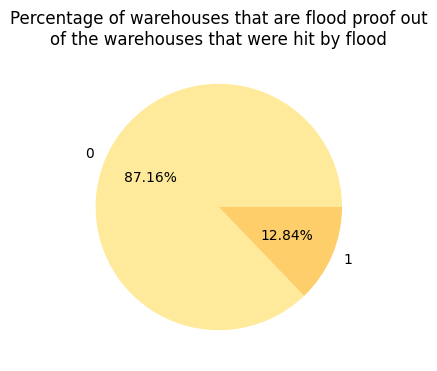

In [124]:
plt.figure(figsize=(16,4))
plt.pie(df[df['flood_impacted']==1]['flood_proof'].value_counts(),
        labels=df[df['flood_impacted']==1]['flood_proof'].value_counts().index,
       autopct='%0.2f%%',colors=sns.color_palette('YlOrRd'))
plt.title("Percentage of warehouses that are flood proof out\nof the warehouses that are in flood impcated area")
plt.show()

In [125]:
# Insight 10: we see out of all the warehouses that are in flood impacted area around only 13% of them
# are flood proof this is because in general most of the warehouses are not flood proof.

In [126]:
avg_storage_issues_reported_on_flood_impact=df.groupby('flood_impacted').aggregate({'storage_issue_reported_l3m':lambda x: x.mean()})

In [127]:
avg_storage_issues_reported_on_flood_impact

storage_issue_reported_l3m
flood_impacted                            
0                                17.139980
1                                17.042787

In [128]:
# Insight 19: we see weather the warehouse is affected by flood or not the average storage issues
# that are reported are almost same.

In [129]:
avg_num_distributors_location_wise=df.groupby('Location_type').aggregate({'distributor_num':lambda x: x.mean()})

In [130]:
avg_num_distributors_location_wise

distributor_num
Location_type                 
Rural                42.430413
Urban                42.279980

In [131]:
avg_num_distributors_size_wise=df.groupby('WH_capacity_size').aggregate({'distributor_num':lambda x: x.mean()})

In [132]:
avg_num_distributors_size_wise

distributor_num
WH_capacity_size                 
Large                   42.411545
Mid                     42.469261
Small                   42.325504

In [133]:
avg_num_distributors_zone_wise=df.groupby('zone').aggregate({'distributor_num':lambda x: x.mean()})

In [134]:
avg_num_distributors_zone_wise

distributor_num
zone                  
East         41.389277
North        42.403289
South        42.300692
West         42.587190

In [135]:
avg_num_distributors_regional_zone_wise=df.groupby('WH_regional_zone').aggregate({'distributor_num':lambda x: x.mean()})

In [136]:
avg_num_distributors_regional_zone_wise

distributor_num
WH_regional_zone                 
Zone 1                  42.198150
Zone 2                  42.386770
Zone 3                  42.513363
Zone 4                  42.497366
Zone 5                  42.572487
Zone 6                  42.325938

In [137]:
# we see no significant difference between the number of distributors for any location, size, zone or
# regional zone wise.

In [138]:
df['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [139]:
pd.crosstab(df['wh_owner_type'],df['Location_type'])

Location_type  Rural  Urban
wh_owner_type              
Company Owned  12480   1098
Rented         10477    945

In [140]:
pd.crosstab(df['wh_owner_type'],df['WH_capacity_size'])

WH_capacity_size  Large   Mid  Small
wh_owner_type                       
Company Owned      5515  5454   2609
Rented             4654  4566   2202

In [141]:
pd.crosstab(df['wh_owner_type'],df['zone'])

zone           East  North  South  West
wh_owner_type                          
Company Owned   235   5536   3448  4359
Rented          194   4742   2914  3572

In [142]:
pd.crosstab(df['wh_owner_type'],df['WH_regional_zone'])

WH_regional_zone  Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6
wh_owner_type                                                   
Company Owned       1131    1582    1582    2290    2507    4486
Rented               923    1381    1299    1886    2080    3853

In [143]:
df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [144]:
pd.crosstab(df['Location_type'],df['flood_impacted'])

flood_impacted      0     1
Location_type              
Rural           20711  2246
Urban            1835   208

In [145]:
# Insight 11: we see that in rural areas out of all the warehouses only 10% are in flood impacted
# area same goes for urban areas that is out of all the warehouses only 10% are in flood impacted area.

In [146]:
df['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [147]:
pd.crosstab(df['WH_capacity_size'],df['flood_impacted'])

flood_impacted       0    1
WH_capacity_size           
Large             9192  977
Mid               9040  980
Small             4314  497

In [148]:
# Insight 12: we see that out of all large scale warehouses only 10% were hit by flood, same goes for
# mid scale warehouses that is only 10% were hit by flood, and same for small scale warehouses that is
# again only 10% were hit by flood.

In [149]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [150]:
pd.crosstab(df['zone'],df['flood_impacted'])

flood_impacted     0     1
zone                      
East             397    32
North           9226  1052
South           5741   621
West            7182   749

In [151]:
# Insight 13: we see out of all warehouse in east only 7% of them were impcated by flood, similarly
# we see out of all warehouse in north only 10% of them were impcated by flood, then we see out of
# all warehouse in south again only 10% of them were impcated by flood, and lastly we see out of all
# warehouses in west again only 10% of them were impcated by flood.

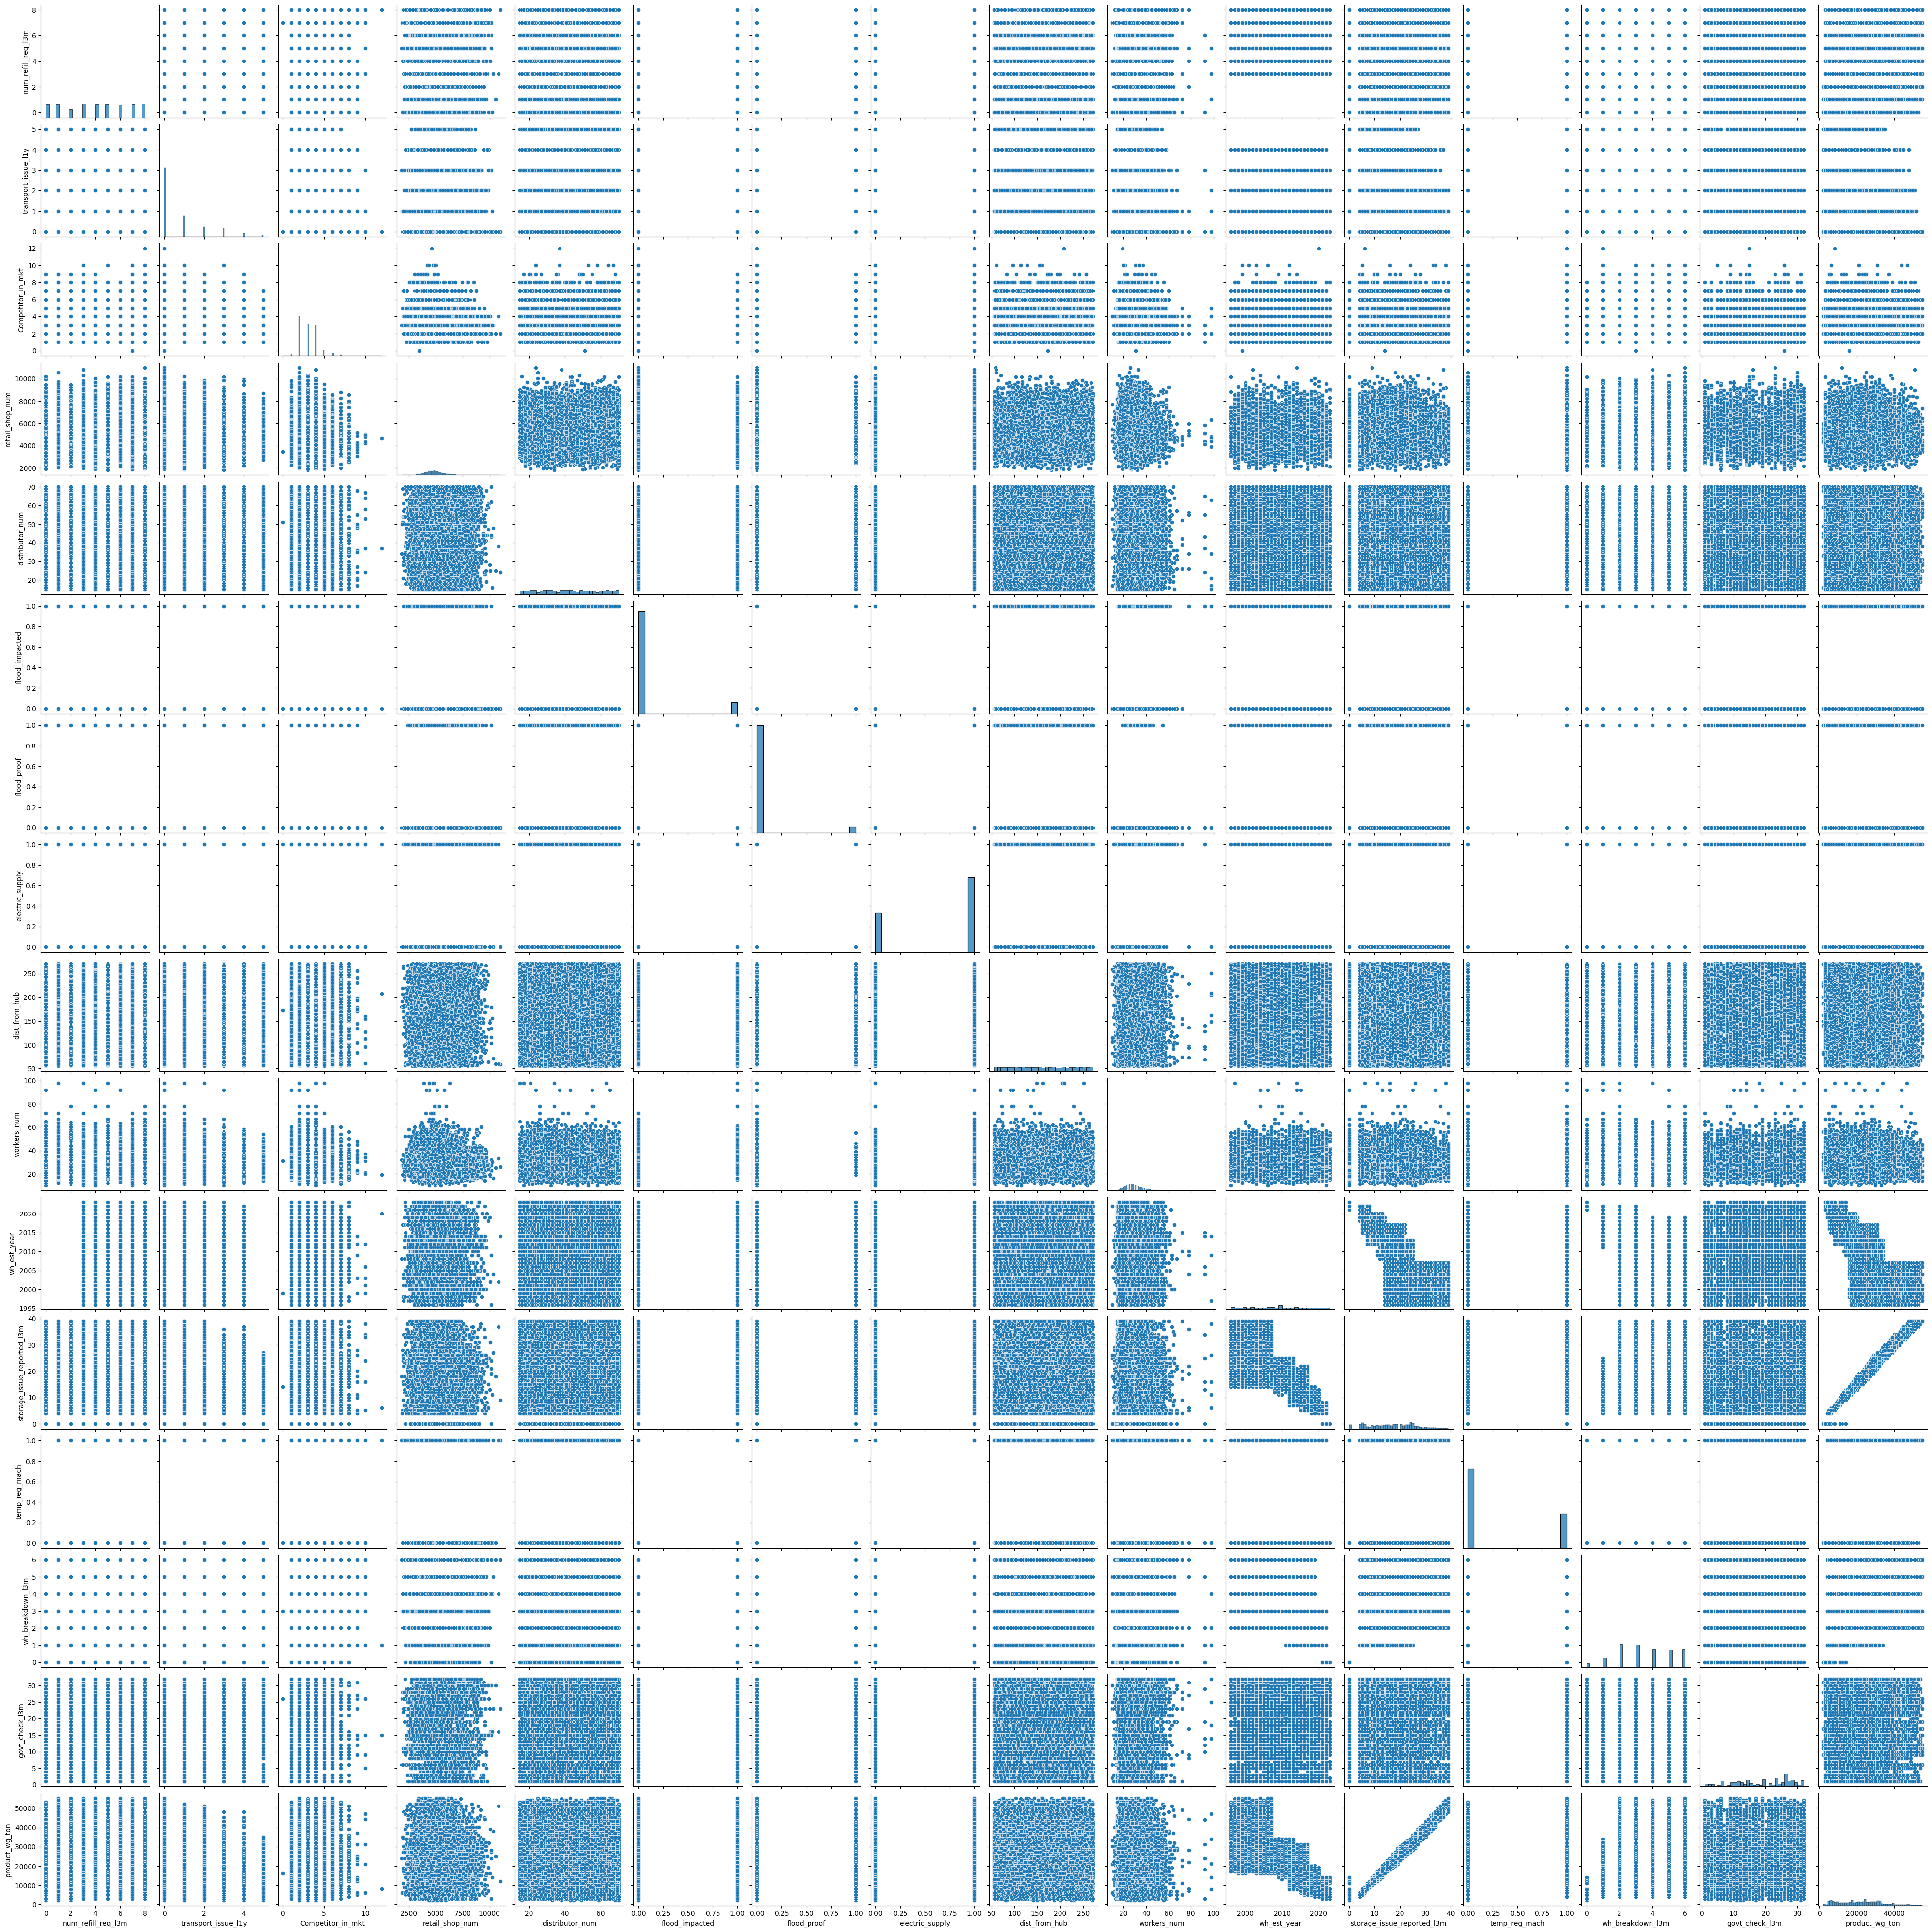

In [152]:
sns.pairplot(df)
plt.show()

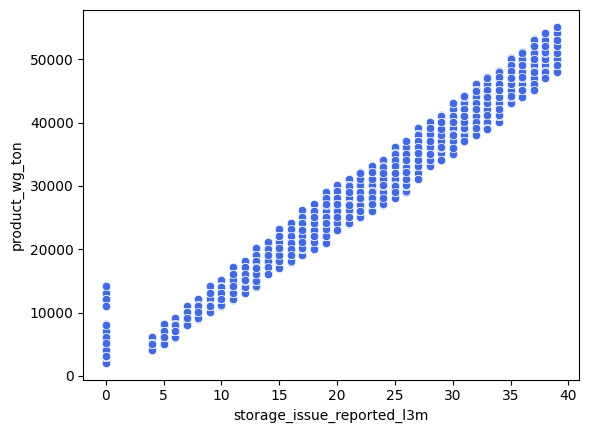

In [153]:
sns.scatterplot(data=df,x='storage_issue_reported_l3m',y='product_wg_ton',color='royalblue')
plt.show()

In [154]:
# Insight 14: we see a pretty strong postive correlation between the storage issue reported in the last
# 3 months and the target variable that is product shipped in last 3 months in tons.

In [155]:
# this tells us that this variable is an important feature for our predictive model we are going to
# create in the future.

In [156]:
# Now lets try to get an idea of the demand pattern in different pockets of the country

In [157]:
# we can get an idea of demand pattern by 3 variables,
# 1- that is num_refill_req_l3m which states the number of times refill was required in the last 3
#    months, now since refill was required meaning the products were sold rapidly and hence to maintain
#    the stock of goods refill was done.
# 2- we can also use retail_shop_num which states the Number of retail shop that sell the product
#    under the warehouse area as more the number of shops selling the product, more the demand of the
#    products.
# 3- lastly we can use the target variable that is product_wg_ton which states the weight of products
#    shipped in last 3 months in tons, this gives us an idea of the demand as more the weight of products
#    shipped more the demand.

In [158]:
# lets Analyze the demand pattern using the num_refill_req_l3m feature

In [159]:
location_wise_avg_demand=df.groupby("Location_type").aggregate({"num_refill_req_l3m":lambda x: x.mean()})
zone_wise_avg_demand=df.groupby("zone").aggregate({"num_refill_req_l3m":lambda x: x.mean()})
regional_zone_wise_avg_demand=df.groupby("WH_regional_zone").aggregate({"num_refill_req_l3m":lambda x: x.mean()})

In [160]:
location_wise_avg_demand

num_refill_req_l3m
Location_type                    
Rural                    4.076273
Urban                    4.232501

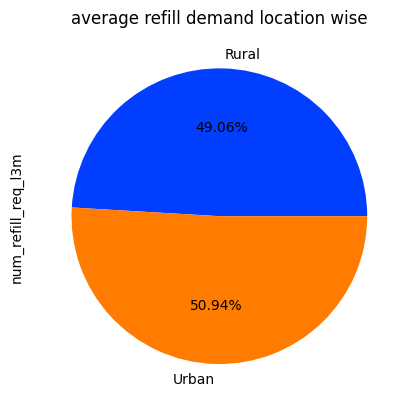

In [161]:
location_wise_avg_demand.plot(kind='pie',y='num_refill_req_l3m',autopct='%0.2f%%',colors=sns.color_palette('bright'),legend=False)
plt.title('average refill demand location wise')
plt.show()

In [162]:
zone_wise_avg_demand

num_refill_req_l3m
zone                     
East             4.072261
North            4.068301
South            4.075291
West             4.127853

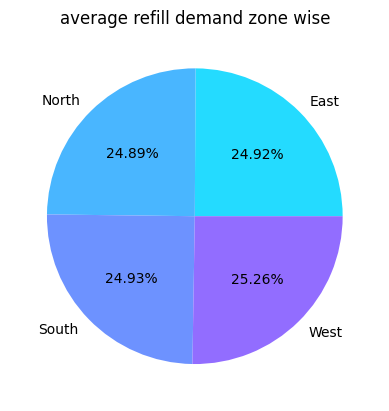

In [163]:
plt.pie(zone_wise_avg_demand['num_refill_req_l3m'],autopct='%0.2f%%',colors=sns.color_palette('cool'),labels=zone_wise_avg_demand.index)
plt.title('average refill demand zone wise')
plt.show()

In [164]:
regional_zone_wise_avg_demand

num_refill_req_l3m
WH_regional_zone                    
Zone 1                      3.954236
Zone 2                      4.077287
Zone 3                      4.131204
Zone 4                      4.126916
Zone 5                      4.083497
Zone 6                      4.095935

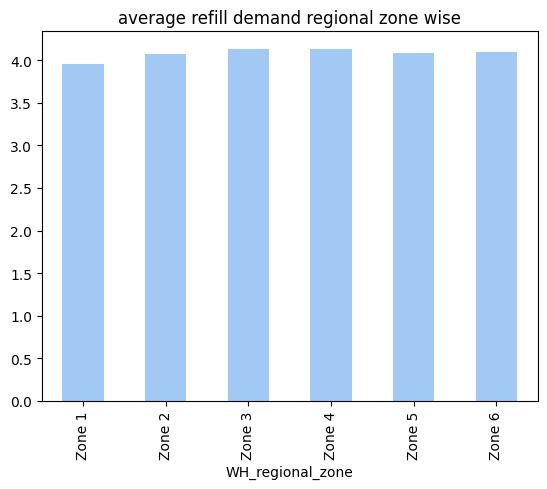

In [165]:
regional_zone_wise_avg_demand.plot(kind='bar',color=sns.color_palette('pastel'),legend=False)
plt.title('average refill demand regional zone wise')
plt.show()

In [166]:
# Insight 15: we see that the according to num_refill_req_l3m feature there is no apparent demand pattern
# in any pockets of the country that is it is almost same in each respective pocket of the country.

In [167]:
# now lets Analyze the demand pattern using the retail_shop_num feature

In [168]:
location_wise_avg_retail=df.groupby("Location_type").aggregate({"retail_shop_num":lambda x: x.mean()})
zone_wise_avg_retail=df.groupby("zone").aggregate({"retail_shop_num":lambda x: x.mean()})
regional_zone_wise_avg_retail=df.groupby("WH_regional_zone").aggregate({"retail_shop_num":lambda x: x.mean()})

In [169]:
location_wise_avg_retail

retail_shop_num
Location_type                 
Rural              4985.937579
Urban              4983.171806

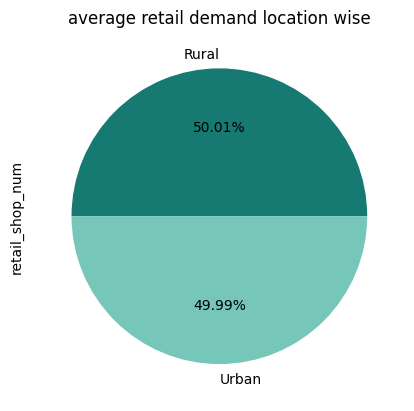

In [170]:
location_wise_avg_retail.plot(kind='pie',y='retail_shop_num',autopct='%0.2f%%',colors=sns.color_palette('BrBG_r'),legend=False)
plt.title('average retail demand location wise')
plt.show()

In [171]:
zone_wise_avg_retail

retail_shop_num
zone                  
East       4804.841492
North      5046.630376
South      5019.298334
West       4889.606481

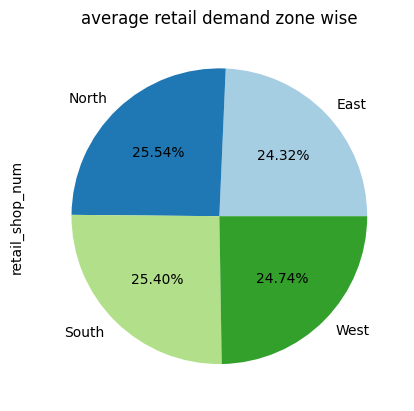

In [172]:
zone_wise_avg_retail.plot(kind='pie',y='retail_shop_num',autopct='%0.2f%%',colors=sns.color_palette('Paired'),legend=False)
plt.title('average retail demand zone wise')
plt.show()

In [173]:
regional_zone_wise_avg_retail

retail_shop_num
WH_regional_zone                 
Zone 1                5174.251704
Zone 2                5023.205872
Zone 3                4824.405762
Zone 4                5026.585010
Zone 5                4916.264225
Zone 6                4999.410121

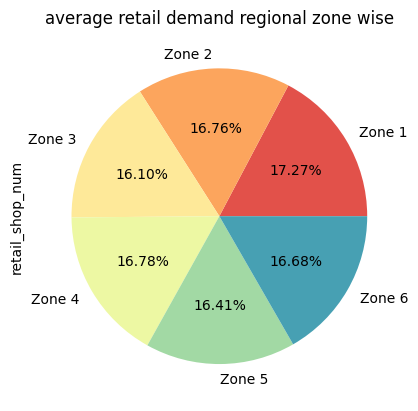

In [174]:
regional_zone_wise_avg_retail.plot(kind='pie',y='retail_shop_num',autopct='%0.2f%%',colors=sns.color_palette('Spectral'),legend=False)
plt.title('average retail demand regional zone wise')
plt.show()

In [175]:
# Insight 16: we see here aswell that the according to retail_shop_num feature there is no apparent demand pattern
# in any pockets of the country that is it is almost same in each respective pocket of the country.

In [176]:
# lastly lets Analyze the demand pattern using the product_wg_ton feature

In [177]:
avg_product_weight_location_wise=df.groupby('Location_type').aggregate({'product_wg_ton':lambda x: x.mean()})
avg_product_weight_zone_wise=df.groupby('zone').aggregate({'product_wg_ton':lambda x: x.mean()})
avg_product_weight_regional_zone_wise=df.groupby('WH_regional_zone').aggregate({'product_wg_ton':lambda x: x.mean()})

In [178]:
avg_product_weight_location_wise

product_wg_ton
Location_type                
Rural            21844.430108
Urban            25004.033774

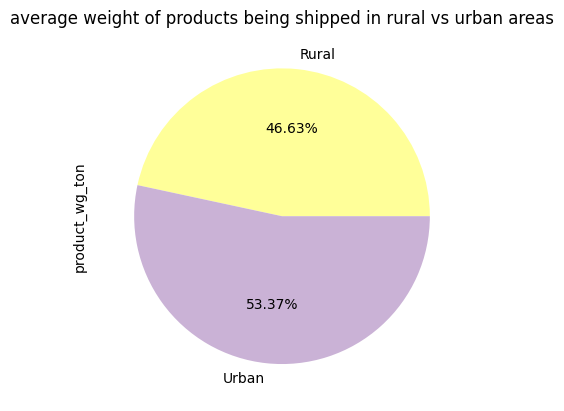

In [179]:
avg_product_weight_location_wise.plot(kind='pie',y='product_wg_ton',colors=sns.color_palette('Paired_r'),autopct='%0.2f%%',legend=False)
plt.title('average weight of products being shipped in rural vs urban areas')
plt.show()

In [180]:
avg_product_weight_zone_wise

product_wg_ton
zone                 
East     22721.452214
North    22199.437926
South    21933.495913
West     22079.384189

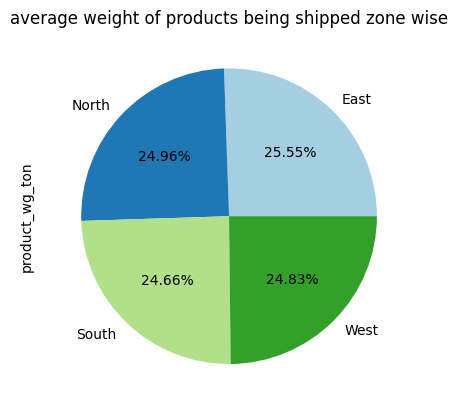

In [181]:
avg_product_weight_zone_wise.plot(kind='pie',y='product_wg_ton',colors=sns.color_palette('Paired'),autopct='%0.2f%%',legend=False)
plt.title('average weight of products being shipped zone wise')
plt.show()

In [182]:
avg_product_weight_regional_zone_wise

product_wg_ton
WH_regional_zone                
Zone 1              21742.712756
Zone 2              22470.728316
Zone 3              21968.146477
Zone 4              22173.378592
Zone 5              22022.588402
Zone 6              22115.559540

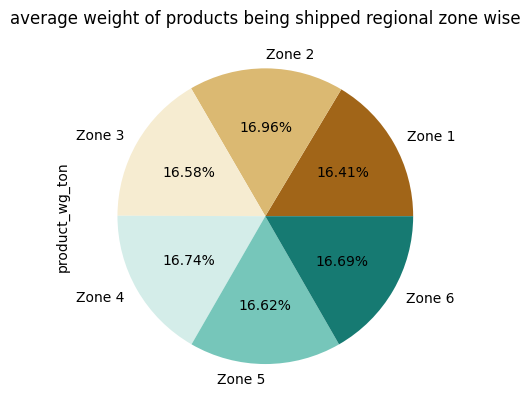

In [183]:
avg_product_weight_regional_zone_wise.plot(kind='pie',y='product_wg_ton',colors=sns.color_palette('BrBG'),autopct='%0.2f%%',legend=False)
plt.title('average weight of products being shipped regional zone wise')
plt.show()

In [184]:
# Insight 17: We observe that according to product_wg_ton feature there around 7% more demand of the
# products in urban areas than rural areas.

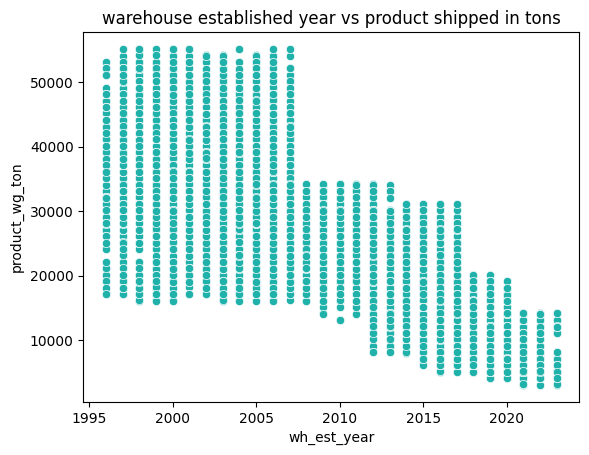

In [185]:
# from pairplot
sns.scatterplot(data=df,x='wh_est_year',y='product_wg_ton',color='lightseagreen')
plt.title('warehouse established year vs product shipped in tons')
plt.show()

In [186]:
# Insight 18: we see that the warehouse that are established recently have less tons of product shipped
# as compared to the earlier ones, which makes sense as recent warehouses would take time to built up
# the pace slowly and gradually.

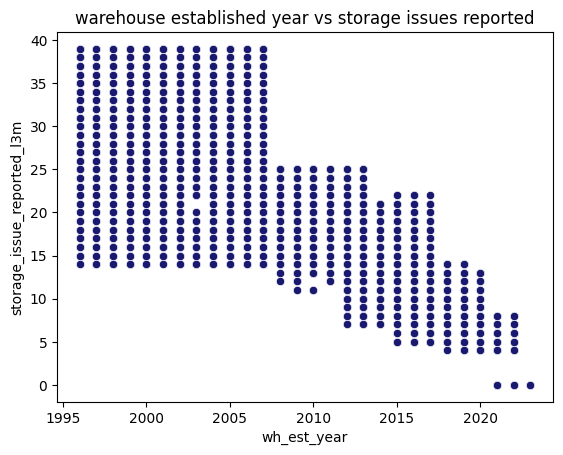

In [187]:
# from pairplot
sns.scatterplot(data=df,x='wh_est_year',y='storage_issue_reported_l3m',color='midnightblue')
plt.title('warehouse established year vs storage issues reported')
plt.show()

In [188]:
# Insight 19: It can be observed that as the time progresses the number of storage issues that are
# reported ten to decrease

In [189]:
avg_product_weight_size_wise=df.groupby('WH_capacity_size').aggregate({'product_wg_ton':lambda x: x.mean()})

In [190]:
avg_product_weight_size_wise

product_wg_ton
WH_capacity_size                
Large               22100.487855
Mid                 22202.298104
Small               21899.591561

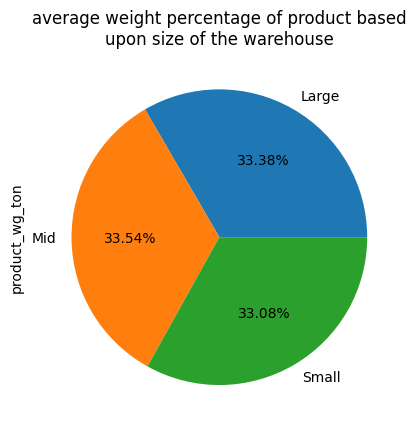

In [191]:
avg_product_weight_size_wise.plot(kind='pie',y='product_wg_ton',autopct='%0.2f%%',legend=False)
plt.title('average weight percentage of product based\nupon size of the warehouse')
plt.show()

In [192]:
# we see the average weight of product that is shipped is almost same for all sizes of warehouses.

# 5 - Data Preprocessing

## 5.1 - Handling Null Values

In [193]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [194]:
(df.isnull().sum()/len(df))*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [195]:
# here the data has 47% of missing values in the wh_est_year column, this is data consists the year in
# which the warehouse is established, now generally when this high amount of data is missing we tend to
# drop the column, apart from that we have to understand that in no way can we infer this data and this
# much amount of data using any statistical technique, we can try by mode imputation but that would
# make the data very imbalanced and the model highly biased, hence here we have no choice other than
# to drop the column otherwise if drop the null values from that column then we would lose 47% of the
# data which is a huge loss of information which is something we do not want hence we remove this
# feature.

In [196]:
df1=df.drop(['wh_est_year'],axis='columns')

In [197]:
(df1.isnull().sum()/len(df))*100

Ware_house_ID                   0.000
WH_Manager_ID                   0.000
Location_type                   0.000
WH_capacity_size                0.000
zone                            0.000
WH_regional_zone                0.000
num_refill_req_l3m              0.000
transport_issue_l1y             0.000
Competitor_in_mkt               0.000
retail_shop_num                 0.000
wh_owner_type                   0.000
distributor_num                 0.000
flood_impacted                  0.000
flood_proof                     0.000
electric_supply                 0.000
dist_from_hub                   0.000
workers_num                     3.960
storage_issue_reported_l3m      0.000
temp_reg_mach                   0.000
approved_wh_govt_certificate    3.632
wh_breakdown_l3m                0.000
govt_check_l3m                  0.000
product_wg_ton                  0.000
dtype: float64

In [198]:
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [199]:
# now we use mode to fill the null values in approved_wh_govt_certificate feature as only 3% of the data
# is null which is a very small number hence we can safely use mode imputation here.

In [200]:
max(df['approved_wh_govt_certificate'].value_counts().index)

'C'

In [201]:
df1['approved_wh_govt_certificate'].fillna(max(df['approved_wh_govt_certificate'].value_counts().index),inplace=True)

In [202]:
(df1.isnull().sum()/len(df))*100

Ware_house_ID                   0.00
WH_Manager_ID                   0.00
Location_type                   0.00
WH_capacity_size                0.00
zone                            0.00
WH_regional_zone                0.00
num_refill_req_l3m              0.00
transport_issue_l1y             0.00
Competitor_in_mkt               0.00
retail_shop_num                 0.00
wh_owner_type                   0.00
distributor_num                 0.00
flood_impacted                  0.00
flood_proof                     0.00
electric_supply                 0.00
dist_from_hub                   0.00
workers_num                     3.96
storage_issue_reported_l3m      0.00
temp_reg_mach                   0.00
approved_wh_govt_certificate    0.00
wh_breakdown_l3m                0.00
govt_check_l3m                  0.00
product_wg_ton                  0.00
dtype: float64

In [203]:
# so now we are only left with workers_num feature that has around 4% missing values and now based upon
# the distribution we can impute the data in this feature with either mean or median.

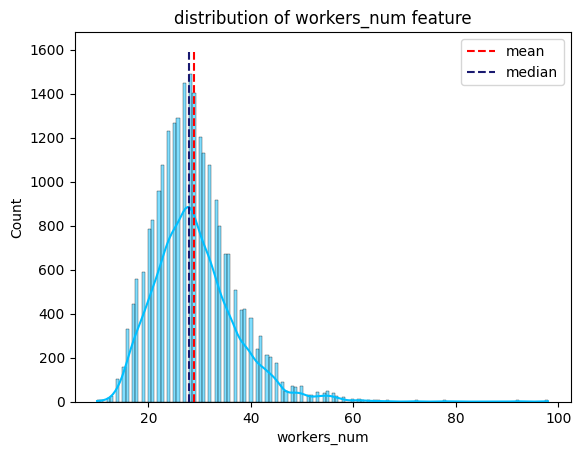

In [204]:
sns.histplot(df['workers_num'],kde=True,color='deepskyblue')
plt.title('distribution of workers_num feature')
plt.plot([df['workers_num'].mean(),df['workers_num'].mean()],[0,1600],linestyle='dashed',color='red',label='mean')
plt.plot([df['workers_num'].median(),df['workers_num'].median()],[0,1600],linestyle='dashed',color='midnightblue',label='median')
plt.legend()
plt.show()

In [205]:
# Insight 20: here we see the data is slightly skewed to the right as the long tail can be seen also the
# mean is slightly on right side of the median hence here the better measure of central tendency would
# be median as the mean is influenced by these values on the far right side or the higher values.

In [206]:
df1['workers_num'].fillna(df1['workers_num'].median(),inplace=True)

In [207]:
# lets last time check for null values
df1.isnull().any()

Ware_house_ID                   False
WH_Manager_ID                   False
Location_type                   False
WH_capacity_size                False
zone                            False
WH_regional_zone                False
num_refill_req_l3m              False
transport_issue_l1y             False
Competitor_in_mkt               False
retail_shop_num                 False
wh_owner_type                   False
distributor_num                 False
flood_impacted                  False
flood_proof                     False
electric_supply                 False
dist_from_hub                   False
workers_num                     False
storage_issue_reported_l3m      False
temp_reg_mach                   False
approved_wh_govt_certificate    False
wh_breakdown_l3m                False
govt_check_l3m                  False
product_wg_ton                  False
dtype: bool

In [208]:
# as we can see our data is free of null values

## 5.2 - Handling nuisance columns

In [209]:
# now lets drop the unnecessarry columns that are of no use in creating the model such as Ware_house_ID
# and WH_Manager_ID which are not only categorical and unique but would provide for nothing in the
# model we create, basically these are redundant columns.

In [210]:
df1.drop(['Ware_house_ID','WH_Manager_ID'],axis='columns',inplace=True)

In [211]:
df1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

## 5.3- Outlier Treatment

In [212]:
for n in df1.columns:
    if df1[str(n)].dtype!='object':
        print(n)

num_refill_req_l3m
transport_issue_l1y
Competitor_in_mkt
retail_shop_num
distributor_num
flood_impacted
flood_proof
electric_supply
dist_from_hub
workers_num
storage_issue_reported_l3m
temp_reg_mach
wh_breakdown_l3m
govt_check_l3m
product_wg_ton


In [213]:
# lets check for outliers in num_refill_req_l3m feature.
df['num_refill_req_l3m'].value_counts()

3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: num_refill_req_l3m, dtype: int64

In [214]:
# we see that our num_refill_req_l3m feature has specific numerical variables in a specific range so
# outlier treatment is not required.

In [215]:
# lets check for outliers in transport_issue_l1y feature.
df['transport_issue_l1y'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64

In [216]:
# here also we see that our transport_issue_l1y feature has specific numerical variables in a specific
# range so outlier treatment is not required.

In [217]:
# lets check for outliers in Competitor_in_mkt feature.
df['Competitor_in_mkt'].value_counts()

2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
12       1
0        1
Name: Competitor_in_mkt, dtype: int64

In [218]:
# we see the same thing again

In [219]:
# lets check for outliers in retail_shop_num feature.
df['retail_shop_num'].value_counts()

4860     22
4808     22
4367     21
4816     21
4659     21
         ..
8585      1
7357      1
8610      1
2653      1
10562     1
Name: retail_shop_num, Length: 4906, dtype: int64

In [220]:
df['retail_shop_num'].describe()

count    25000.000000
mean      4985.711560
std       1052.825252
min       1821.000000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max      11008.000000
Name: retail_shop_num, dtype: float64

In [221]:
# we see the mean and median has slight gap between them, this might indicate outliers
# lets visualize it to get a better understanding.

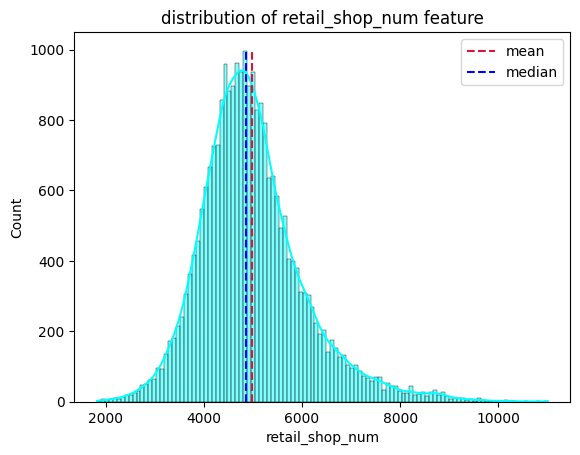

In [222]:
sns.histplot(df['retail_shop_num'],kde=True,color='cyan')
plt.title('distribution of retail_shop_num feature')
plt.plot([df['retail_shop_num'].mean(),df['retail_shop_num'].mean()],[0,1000],linestyle='dashed',color='crimson',label='mean')
plt.plot([df['retail_shop_num'].median(),df['retail_shop_num'].median()],[0,1000],linestyle='dashed',color='blue',label='median')
plt.legend()
plt.show()

In [223]:
# Insight 21: we see the data is quite normally distributed though there seems to be little skewness
# towards the right but that seems to be natural variation, so no need for outlier treatment.

In [224]:
# lets check for outliers in distributor_num feature.
df['distributor_num'].value_counts()

31    490
41    481
69    481
37    479
29    479
21    478
40    477
28    474
47    469
33    467
42    464
22    460
63    459
48    458
38    457
44    457
36    454
24    454
59    454
35    453
65    453
64    452
27    452
23    450
49    449
50    449
62    447
46    446
55    445
61    444
56    443
43    442
52    442
26    442
20    440
54    440
57    439
18    439
70    438
32    438
15    436
30    434
45    434
16    431
58    429
51    429
39    426
67    422
66    421
25    420
34    418
60    417
53    417
19    416
17    415
68    400
Name: distributor_num, dtype: int64

In [225]:
df['distributor_num'].describe()

count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64

In [226]:
# here we see the mean and median as same so we can safely assume that there are no outliers.

In [227]:
# lets check for outliers in flood_impacted feature.
df['flood_impacted'].value_counts()

0    22546
1     2454
Name: flood_impacted, dtype: int64

In [228]:
# as we can clearly see no requirement for outlier treatment.

In [229]:
# lets check for outliers in flood_proof feature.
df['flood_proof'].value_counts()

0    23634
1     1366
Name: flood_proof, dtype: int64

In [230]:
# same again no requirement for outlier treatment.

In [231]:
# lets check for outliers in electric_supply feature.
df['electric_supply'].value_counts()

1    16422
0     8578
Name: electric_supply, dtype: int64

In [232]:
# same again no requirement for outlier treatment.

In [233]:
# lets check for outliers in dist_from_hub feature.
df['dist_from_hub'].value_counts()

239    144
84     142
209    140
258    140
204    140
      ... 
95      94
124     94
130     94
138     93
88      92
Name: dist_from_hub, Length: 217, dtype: int64

In [234]:
df['dist_from_hub'].describe()

count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64

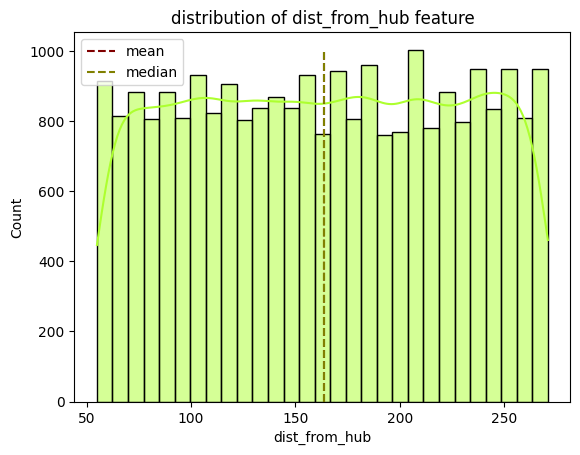

In [235]:
sns.histplot(df['dist_from_hub'],kde=True,color='greenyellow')
plt.title('distribution of dist_from_hub feature')
plt.plot([df['dist_from_hub'].mean(),df['dist_from_hub'].mean()],[0,1000],linestyle='dashed',color='maroon',label='mean')
plt.plot([df['dist_from_hub'].median(),df['dist_from_hub'].median()],[0,1000],linestyle='dashed',color='olive',label='median')
plt.legend()
plt.show()

In [236]:
# as we can clearly see the distribution is uniform and the mean and median are almost overlapping 
# each other hence no requirement for outlier treatment.

In [237]:
# lets check for outliers in workers_num feature.
df['workers_num'].value_counts()

28.0    1491
27.0    1447
29.0    1402
26.0    1290
25.0    1268
24.0    1228
30.0    1202
31.0    1132
32.0    1077
23.0    1077
22.0     959
33.0     916
21.0     826
34.0     796
20.0     783
36.0     671
35.0     670
19.0     590
18.0     559
37.0     506
17.0     445
39.0     419
38.0     417
40.0     381
16.0     328
42.0     298
41.0     240
43.0     212
44.0     204
45.0     175
15.0     155
14.0     104
46.0      91
50.0      73
48.0      71
49.0      65
55.0      50
47.0      47
53.0      45
56.0      40
54.0      39
51.0      30
52.0      29
13.0      24
57.0      24
58.0      20
12.0      15
61.0      14
60.0      10
10.0       5
78.0       5
98.0       5
62.0       5
92.0       5
65.0       5
64.0       5
72.0       5
11.0       5
67.0       5
63.0       5
Name: workers_num, dtype: int64

In [238]:
df['workers_num'].describe()

count    24010.000000
mean        28.944398
std          7.872534
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64

In [239]:
# as we can clearly see the mean and median are almost overlapping each other hence no requirement
# for outlier treatment.

In [240]:
# lets check for outliers in storage_issue_reported_l3m feature.
df['storage_issue_reported_l3m'].value_counts()

24    1424
5     1351
25    1262
4     1081
18    1070
20    1065
6     1056
19    1022
16     938
23     917
22     912
0      908
15     908
11     867
14     821
9      787
17     749
12     739
13     726
21     687
10     637
26     609
27     585
7      491
8      406
30     337
28     336
29     321
32     296
33     295
31     289
34     288
38     181
35     181
36     161
39     156
37     141
Name: storage_issue_reported_l3m, dtype: int64

In [241]:
df['storage_issue_reported_l3m'].describe()

count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64

In [242]:
# again as we can clearly see the mean and median are almost overlapping each other hence no
# requirement for outlier treatment.

In [243]:
# lets check for outliers in temp_reg_mach feature.
df['temp_reg_mach'].value_counts()

0    17418
1     7582
Name: temp_reg_mach, dtype: int64

In [244]:
# as we can clearly see no requirement for outlier treatment.

In [245]:
# lets check for outliers in wh_breakdown_l3m feature.
df['wh_breakdown_l3m'].value_counts()

2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: wh_breakdown_l3m, dtype: int64

In [246]:
# again as we can clearly see no requirement for outlier treatment.

In [247]:
# lets check for outliers in govt_check_l3m feature.
df['govt_check_l3m'].value_counts()

26    2908
23    1828
19    1604
28    1465
14    1429
27    1277
6     1224
11    1160
12     947
32     940
9      932
29     901
10     899
25     884
15     689
21     649
24     628
1      550
17     497
3      438
2      431
13     429
30     404
31     362
22     309
8      276
5      250
18     217
16     201
20     108
4       99
7       65
Name: govt_check_l3m, dtype: int64

In [248]:
df['govt_check_l3m'].describe()

count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64

In [249]:
# we see a small gap between the mean and the median, lets investigate further visually.

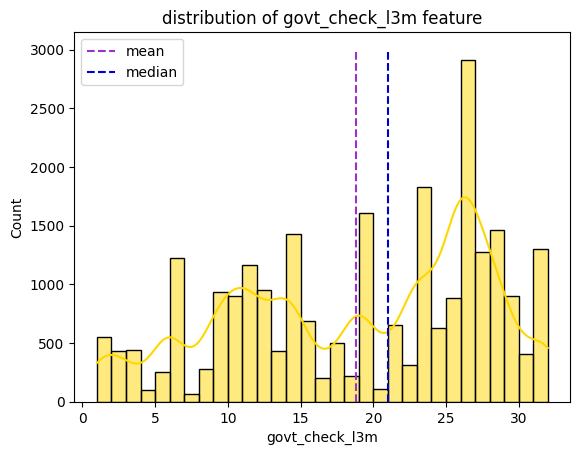

In [250]:
sns.histplot(df['govt_check_l3m'],kde=True,color='gold')
plt.title('distribution of govt_check_l3m feature')
plt.plot([df['govt_check_l3m'].mean(),df['govt_check_l3m'].mean()],[0,3000],linestyle='dashed',color='darkorchid',label='mean')
plt.plot([df['govt_check_l3m'].median(),df['govt_check_l3m'].median()],[0,3000],linestyle='dashed',color='mediumblue',label='median')
plt.legend()
plt.show()

In [251]:
# now the gap is due to the randomness in the distribution, not due to the outliers hence no requirement
# for outlier treatment.

In [252]:
# lastly lets check for outliers in the target variable that is product_wg_ton.
df['product_wg_ton'].describe()

count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

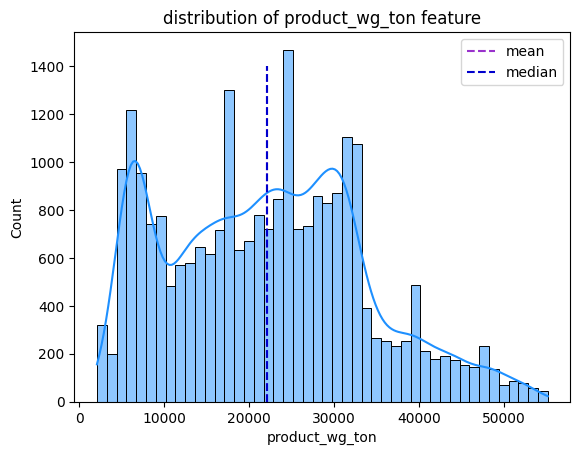

In [253]:
sns.histplot(df['product_wg_ton'],kde=True,color='dodgerblue')
plt.title('distribution of product_wg_ton feature')
plt.plot([df['product_wg_ton'].mean(),df['product_wg_ton'].mean()],[0,1400],linestyle='dashed',color='darkorchid',label='mean')
plt.plot([df['product_wg_ton'].median(),df['product_wg_ton'].median()],[0,1400],linestyle='dashed',color='mediumblue',label='median')
plt.legend()
plt.show()

In [254]:
# Insight 28: we can clearly see that mean and median are very close to each other hence no skewness
# and also we can see there are no outliers.

In [255]:
# hence we are now done with our outlier treatment for the numerical features.

## 5.4- Encoding

In [256]:
# lets convert the categorical features to numerical

In [257]:
# categorical features
for n in df1.columns:
    if df1[str(n)].dtype=='object':
        print(n)

Location_type
WH_capacity_size
zone
WH_regional_zone
wh_owner_type
approved_wh_govt_certificate


In [258]:
# Insight 22: here the Location_type, zone, WH_regional_zone and wh_owner_type are categorical nominal
# features, while WH_capacity_size and approved_wh_govt_certificate are categorical ordinal features
# hence we perform different encodings on them.

In [259]:
# performing ordinal encoding on WH_capacity_size feature

In [260]:
print(df1['WH_capacity_size'].value_counts())

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


In [261]:
# small- 1 ; mid- 2 ; large- 3
size_mapper={'Small':1,'Mid':2,'Large':3}
df1['WH_capacity_size']=df1['WH_capacity_size'].replace(size_mapper)

In [262]:
# performing ordinal encoding on approved_wh_govt_certificate feature

In [263]:
print(df1['approved_wh_govt_certificate'].value_counts())

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


In [264]:
# C: 1, B: 2, B+: 3, A: 4,A+: 5
govt_certificate_mapper={'C':1,'B':2,'B+':3,'A':4,'A+':5}
df1['approved_wh_govt_certificate']=df1['approved_wh_govt_certificate'].replace(govt_certificate_mapper)

In [265]:
# performing one-hot encoding in Location_type, WH_regional_zone, zone and wh_owner_type features
# we also drop one of the one-hot encoded column for each feature to avoid dummy variable trap.
# and since we are encoding these features the original features are of no use to us anymore, so we
# drop them.

In [266]:
df2=pd.concat([df1,pd.get_dummies(df['Location_type'],drop_first=True),pd.get_dummies(df['WH_regional_zone'],drop_first=True),pd.get_dummies(df['zone'],drop_first=True),pd.get_dummies(df['wh_owner_type'],drop_first=True)],axis='columns')
df2.drop(['Location_type','WH_regional_zone','zone','wh_owner_type'],axis='columns',inplace=True)

In [267]:
df2

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                     1                   3                    1   
1                     3                   0                    0   
2                     2                   1                    0   
3                     2                   7                    4   
4                     3                   3                    1   
...                 ...                 ...                  ...   
24995                 1                   3                    0   
24996                 2                   6                    0   
24997                 3                   7                    0   
24998                 1                   1                    0   
24999                 2                   8                    2   

       Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                      2             4651               24               0   
1                      4             6217               47               0   
2                      4             4306               64               0   
3                      2             6000               50               0   
4                      2             4740               42               1   
...                  ...              ...              ...             ...   
24995                  4             5390               19               0   
24996                  4             4490               57               0   
24997                  2             5403               31               1   
24998                  2            10562               25               0   
24999                  4             5664               21               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0                1                1             91         29.0   
1                0                1            210         31.0   
2                0                0            161         37.0   
3                0                0            103         21.0   
4                0                1            112         25.0   
...            ...              ...            ...          ...   
24995            0                1            142         34.0   
24996            0                1            130         28.0   
24997            0                1            147         28.0   
24998            0                1             60         25.0   
24999            1                1            239         39.0   

       storage_issue_reported_l3m  temp_reg_mach  \
0                              13              0   
1                               4              0   
2                              17              0   
3                              17              1   
4                              18              0   
...                           ...            ...   
24995                          22              1   
24996                          10              0   
24997                          23              0   
24998                          18              0   
24999                           4              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 4                 5              15   
1                                 4                 3              17   
2                                 4                 6              22   
3                                 5                 3              27   
4                                 1                 6              24   
...                             ...               ...             ...   
24995                             4                 2              30   
24996                             2                 4              18   
24997                             3                 5              25   
24998                             4                 6              30   
24999               

In [268]:
# we are done with encoding our data and now we can see all of our data is in numerical format

## 5.5- Handling Multicollinearity

In [269]:
# lets check for multicollinearity in our data

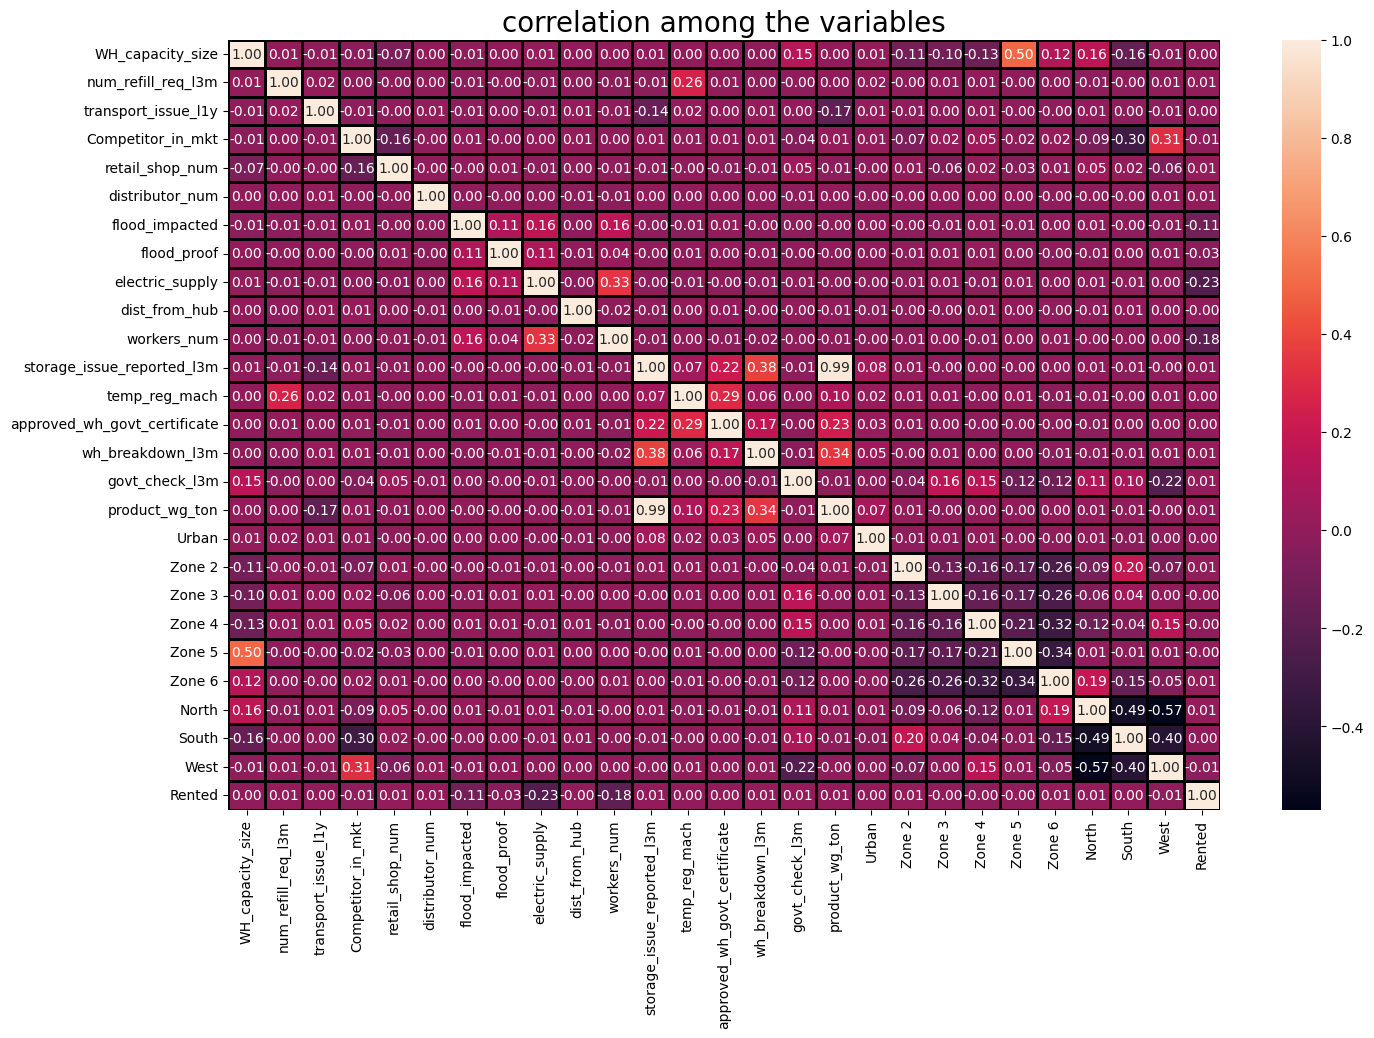

In [270]:
plt.figure(figsize=(16,10))
plt.title('correlation among the variables',fontsize=20)
sns.heatmap(df2.corr(),cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.show()

In [271]:
# Insight 29: as we saw earlier as well how strongly and positively correlated the target variable is
# with storage_issue_reported_l3m feature, apart from that there is no apparent multicollinearity in
# the data.

## 5.6- Standardization or Normalization

In [272]:
# now standardization centralizes our data with mean as 0 and standard deviation as 1,
# while normaliztion only brings the range of the data between 0 and 1, while the original shape
# of the data is retained.
# so in most cases standardization is better than normaliztion

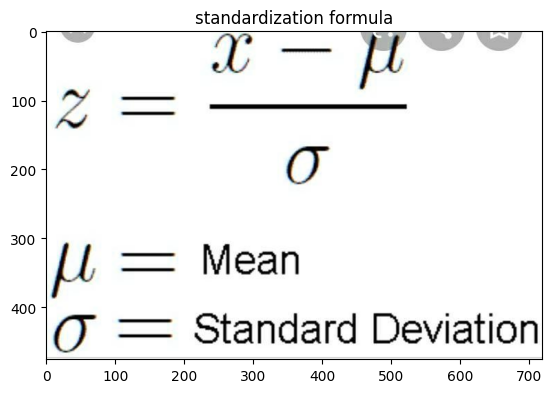

In [273]:
# this is the formula for standardization
img_arr=cv2.imread('standardization_formula.jpg')
plt.imshow(img_arr)
plt.title('standardization formula')
plt.show()

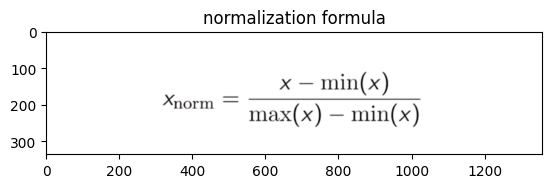

In [274]:
# this is the formula for normalization
img_arr1=cv2.imread('normalization_formula.png')
plt.imshow(img_arr1)
plt.title('normalization formula')
plt.show()

In [275]:
# Scaling the data using standard scaler

In [276]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(df2)

In [277]:
scaled_data=pd.DataFrame(scaled_array,columns=[df2.columns])

In [278]:
scaled_data

WH_capacity_size num_refill_req_l3m transport_issue_l1y  \
0            -1.632547          -0.417807            0.188690   
1             1.056278          -1.568750           -0.645043   
2            -0.288135          -1.185102           -0.645043   
3            -0.288135           1.116783            2.689890   
4             1.056278          -0.417807            0.188690   
...                ...                ...                 ...   
24995        -1.632547          -0.417807           -0.645043   
24996        -0.288135           0.733135           -0.645043   
24997         1.056278           1.116783           -0.645043   
24998        -1.632547          -1.185102           -0.645043   
24999        -0.288135           1.500430            1.022424   

      Competitor_in_mkt retail_shop_num distributor_num flood_impacted  \
0             -0.967205       -0.317924       -1.146546      -0.329915   
1              0.784661        1.169532        0.285226      -0.329915   
2              0.784661       -0.645620        1.343493      -0.329915   
3             -0.967205        0.963416        0.471979      -0.329915   
4             -0.967205       -0.233388       -0.026028       3.031081   
...                 ...             ...             ...            ...   
24995          0.784661        0.384011       -1.457801      -0.329915   
24996          0.784661       -0.470849        0.907736      -0.329915   
24997         -0.967205        0.396359       -0.710789       3.031081   
24998         -0.967205        5.296605       -1.084295      -0.329915   
24999          0.784661        0.644268       -1.333299      -0.329915   

      flood_proof electric_supply dist_from_hub workers_num  \
0        4.159520        0.722737     -1.156575    0.012051   
1       -0.240412        0.722737      0.740827    0.271215   
2       -0.240412       -1.383630     -0.040456    1.048707   
3       -0.240412       -1.383630     -0.965240   -1.024605   
4       -0.240412        0.722737     -0.821739   -0.506277   
...           ...             ...           ...         ...   
24995   -0.240412        0.722737     -0.343403    0.659961   
24996   -0.240412        0.722737     -0.534737   -0.117531   
24997   -0.240412        0.722737     -0.263680   -0.117531   
24998   -0.240412        0.722737     -1.650856   -0.506277   
24999    4.159520        0.722737      1.203218    1.307871   

      storage_issue_reported_l3m temp_reg_mach approved_wh_govt_certificate  \
0                      -0.450876     -0.659770                     0.827956   
1                      -1.433309     -0.659770                     0.827956   
2                      -0.014239     -0.659770                     0.827956   
3                      -0.014239      1.515679                     1.527787   
4                       0.094921     -0.659770                    -1.271537   
...                          ...           ...                          ...   
24995                   0.531558      1.515679                     0.827956   
24996                  -0.778354     -0.659770                    -0.571706   
24997                   0.640717     -0.659770                     0.128125   
24998                   0.094921     -0.659770                     0.827956   
24999                  -1.433309     -0.659770                     0.128125   

      wh_breakdown_l3m govt_check_l3m product_wg_ton     Urban    Zone 2  \
0             0.898041      -0.441634      -0.429690  3.352150 -0.366682   
1            -0.285180      -0.209944      -1.467034 -0.298316 -0.366682   
2             1.489652       0.369282       0.089112 -0.298316  2.727159   
3            -0.285180       0.948508       0.001065 -0.298316 -0.366682   
4             1.489652       0.600972       0.169577 -0.298316 -0.366682   
...                ...            ...            ...       ...       ...   
24995        -0.876791       1.296044       0.860680 -0.298316 -0.366682   
24996         0.306431

## 5.7- Feature Importance/Feature Selection/Feature Reduction

In [279]:
# now that our data is scaled lets go ahead and try to extract the important features from our data

In [280]:
# before that lets split our data to train and test set.
X=scaled_data.drop(['product_wg_ton'],axis='columns')
Y=scaled_data['product_wg_ton'].squeeze()
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4808\4135177971.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X=scaled_data.drop(['product_wg_ton'],axis='columns')


In [281]:
# feature selection using Mutual Info Regression
mutual_info=mutual_info_regression(x_train,y_train)

In [282]:
feature_imporatnce=pd.Series(mutual_info)
feature_imporatnce.index=X.columns
feature_imporatnce.sort_values(ascending=False)

storage_issue_reported_l3m      2.115629
wh_breakdown_l3m                0.163985
approved_wh_govt_certificate    0.084257
transport_issue_l1y             0.031194
temp_reg_mach                   0.019320
North                           0.008454
WH_capacity_size                0.005212
South                           0.002982
Urban                           0.002882
retail_shop_num                 0.002775
Zone 2                          0.002696
num_refill_req_l3m              0.002331
Zone 5                          0.001602
Zone 6                          0.001486
flood_impacted                  0.001480
Zone 4                          0.000757
flood_proof                     0.000314
electric_supply                 0.000000
Zone 3                          0.000000
govt_check_l3m                  0.000000
distributor_num                 0.000000
workers_num                     0.000000
Competitor_in_mkt               0.000000
dist_from_hub                   0.000000
West            

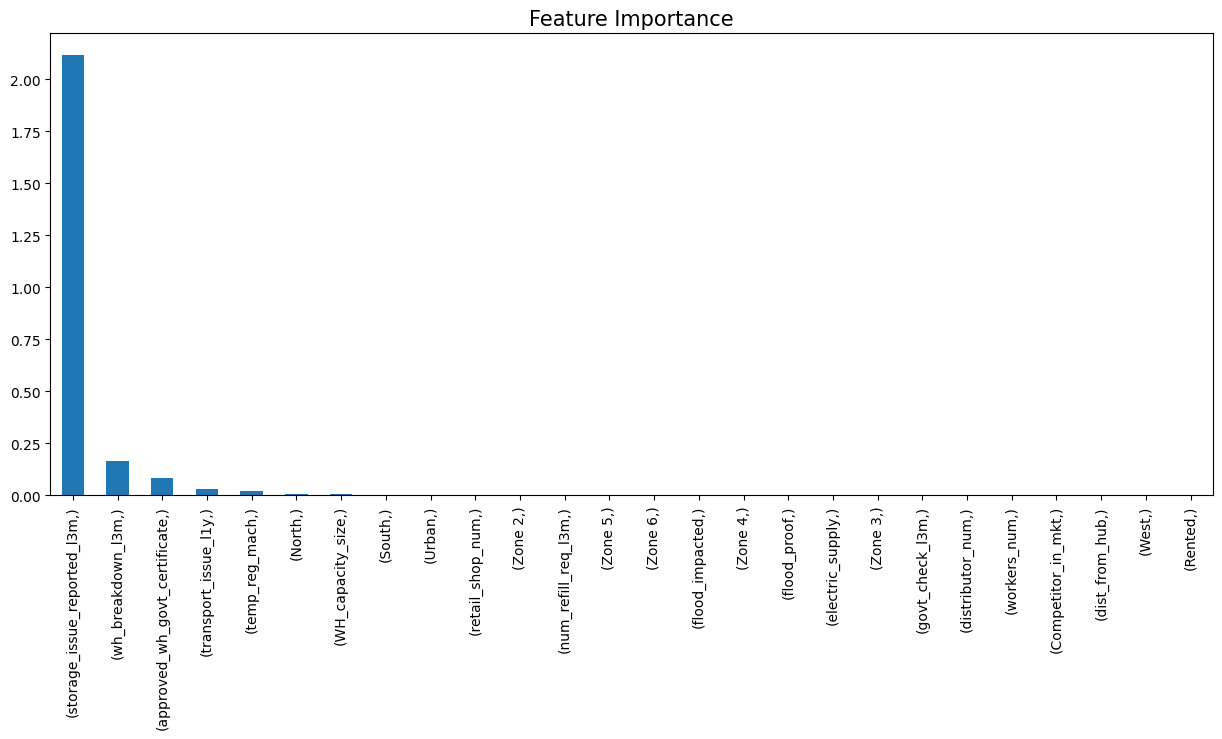

In [283]:
feature_imporatnce.sort_values(ascending=False).plot(kind='bar',figsize=(15,6))
plt.title('Feature Importance',fontsize=15)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4808\4109527947.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  feature_imporatnce.sort_values(ascending=False).drop('storage_issue_reported_l3m').plot(kind='bar',figsize=(15,6))


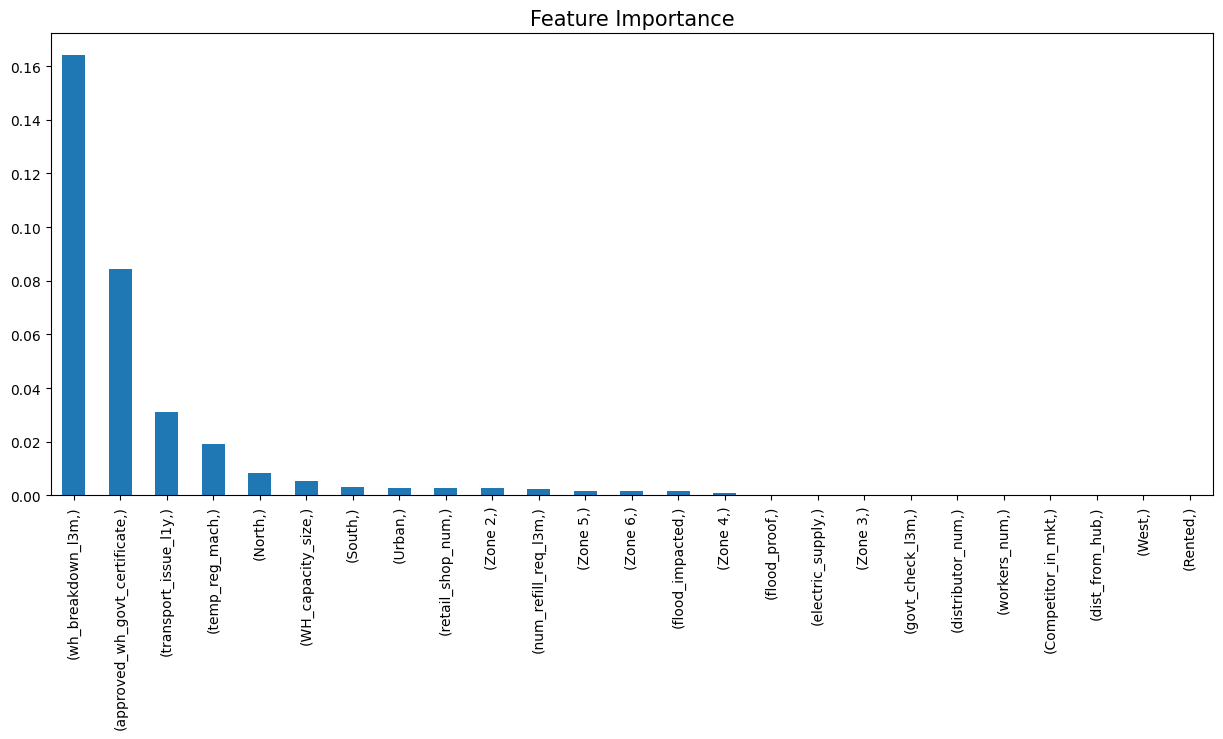

In [284]:
feature_imporatnce.sort_values(ascending=False).drop('storage_issue_reported_l3m').plot(kind='bar',figsize=(15,6))
plt.title('Feature Importance',fontsize=15)
plt.show()

In [285]:
# Insight 23: we see that flood_proof, Competitor_in_mkt, Zone 3, dist_from_hub, govt_check_l3m,
# distributor_num, flood_impacted, workers_num and Rented are the features which are contributing
# almost negligible. Hence we remove them from the data

In [286]:
X=df2.drop(['flood_proof','Competitor_in_mkt','Zone 3','dist_from_hub','govt_check_l3m','distributor_num','flood_impacted','workers_num','Rented','product_wg_ton'],axis='columns')
Y=df2['product_wg_ton'].squeeze()

In [287]:
# lets again scale our data
scaler=StandardScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X),columns=[X.columns])

In [288]:
# so this is our final independent feature set that we are going to use to create our model
X

WH_capacity_size num_refill_req_l3m transport_issue_l1y retail_shop_num  \
0            -1.632547          -0.417807            0.188690       -0.317924   
1             1.056278          -1.568750           -0.645043        1.169532   
2            -0.288135          -1.185102           -0.645043       -0.645620   
3            -0.288135           1.116783            2.689890        0.963416   
4             1.056278          -0.417807            0.188690       -0.233388   
...                ...                ...                 ...             ...   
24995        -1.632547          -0.417807           -0.645043        0.384011   
24996        -0.288135           0.733135           -0.645043       -0.470849   
24997         1.056278           1.116783           -0.645043        0.396359   
24998        -1.632547          -1.185102           -0.645043        5.296605   
24999        -0.288135           1.500430            1.022424        0.644268   

      electric_supply storage_issue_reported_l3m temp_reg_mach  \
0            0.722737                  -0.450876     -0.659770   
1            0.722737                  -1.433309     -0.659770   
2           -1.383630                  -0.014239     -0.659770   
3           -1.383630                  -0.014239      1.515679   
4            0.722737                   0.094921     -0.659770   
...               ...                        ...           ...   
24995        0.722737                   0.531558      1.515679   
24996        0.722737                  -0.778354     -0.659770   
24997        0.722737                   0.640717     -0.659770   
24998        0.722737                   0.094921     -0.659770   
24999        0.722737                  -1.433309     -0.659770   

      approved_wh_govt_certificate wh_breakdown_l3m     Urban    Zone 2  \
0                         0.827956         0.898041  3.352150 -0.366682   
1                         0.827956        -0.285180 -0.298316 -0.366682   
2                         0.827956         1.489652 -0.298316  2.727159   
3                         1.527787        -0.285180 -0.298316 -0.366682   
4                        -1.271537         1.489652 -0.298316 -0.366682   
...                            ...              ...       ...       ...   
24995                     0.827956        -0.876791 -0.298316 -0.366682   
24996                    -0.571706         0.306431 -0.298316  2.727159   
24997                     0.128125         0.898041  3.352150 -0.366682   
24998                     0.827956         1.489652 -0.298316 -0.366682   
24999                     0.128125        -0.876791 -0.298316 -0.366682   

         Zone 4    Zone 5    Zone 6     North     South      West  
0     -0.447815 -0.474036  1.413493 -0.835547 -0.584248  1.467034  
1     -0.447815  2.109546 -0.707467  1.196821 -0.584248 -0.681648  
2     -0.447815 -0.474036 -0.707467 -0.835547  1.711602 -0.681648  
3     -0.447815 -0.474036 -0.707467  1.196821 -0.584248 -0.681648  
4     -0.447815  2.109546 -0.707467  1.196821 -0.584248 -0.681648  
...         ...       ...       ...       ...       ...       ...  
24995 -0.447815 -0.474036 -0.707467  1.196821 -0.584248 -0.681648  
24996 -0.447815 -0.474036 -0.707467 -0.835547 -0.584248  1.467034  
24997 -0.447815  2.109546 -0.707467 -0.835547  1.711602 -0.681648  
24998 -0.447815 -0.474036 -0.707467  1.196821 -0.584248 -0.681648  
24999  2.233067 -0.474036 -0.707467 -0.835547 -0.584248  1.467034  

[25000 rows x 17 columns]

In [289]:
# now lets split into train test set again
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=5)

# 6 - Modelling

## 6.1 - Linear Regression

In [290]:
# lets start with the classic Linear regression algorithm

In [291]:
# model_1: Linear Regression
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [292]:
model_1.score(x_train,y_train)

0.97696501675946

In [293]:
model_1.score(x_test,y_test)

0.9778869641276442

In [294]:
# Insight 24: Wow! in our first model only we got the accuracy score which is R^2 here for regression
# as 0.97, that is around 97% accuracy, and that too without any bias, variance, underfitting or
# overfitting

In [295]:
# now with this good of a score without any overfitting we can be satisfied but just for the sake of
# it lets try out few other algorithms.

## 6.2 - Decision Tree

In [296]:
# now lets try another simple algorithm that is decision tree.

In [297]:
# model_2: Decision Tree
model_2=DecisionTreeRegressor()
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [298]:
model_2.score(x_train,y_train)

1.0

In [299]:
model_2.score(x_test,y_test)

0.9872694609737394

In [300]:
# Insight 25: This is getting better, we see that the decision tree algorithm predicts the training data
# with 100% accuracy while it predicts the test data with 98% accuracy.

In [301]:
# lets just take it one more step ahead and try it with yet another algorithm.

## 6.3 - Random Forest

In [302]:
# now lets try this time with Random Forest Algorithm.

In [303]:
# model_3: Random Forest
model_3=RandomForestRegressor()
model_3.fit(x_train,y_train)

RandomForestRegressor()

In [304]:
model_3.score(x_train,y_train)

0.9990199822687139

In [305]:
model_3.score(x_test,y_test)

0.9928910700206434

In [306]:
# Insight 26: That's it, we have reached the pinnacle of performance without overfitting, bias, or
# variance we managed get not 80, not 90 but 99% accuracy in train as well as test set !

# 7 - Conclusion

### In This Notebook we started out with a problem statement given to us by the stakeholders of an FMCG company who entered into the instant noodles business two years back and the higher management wants to optimize the supply quantity in every warehouse in the entire country based upon the historical data to predict the optimum weight of the product to be shipped each time to the warehouse. We started out with analyzing the data to get some important insights from the data for the stakeholders, then we did some data preprocessing before creating a model and tried to get a model that gives the best predictions and in that pursuit we got a model that can predict the output with not 80, not 90 but with 99% accuracy, and that too without any overfitting, bias or variance.

### So this concludes our project

### Now lets create a web application that can help the stakeholders to easily predict the output by just entering some relevant variable features. This would make the job of the stakeholders very easy as they just have to enter some values and they would get their desired output by just a click and that too with a 99% accuracy.

In [307]:
# exporting the scaler and the model
dump(scaler,'scaler.joblib')
dump(model_3,'final_model.joblib')

['final_model.joblib']